# Module 6 - Group Assignment - Telecom Churn Case study

##### Team members
- Truong Tuyet Lam
- Amit Kumar
- Gushpu T

# A. Business Problem Overview:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

This project is based on the Indian and Southeast Asian market where pre-paid is the most common model in telecom industry.

Definition of churn is defined based on usage. In other words, 'usage-based-churn' is applied in this case to define customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

In the Indian and Southeast Asian markets, approximately 80% of revenue comes from the top 20% of customers (called high-value customers). Thus, if we can reduce the churn of high-value customers, we will be able to reduce significant revenue leakage.

# B. Business Goals
A customer level data of a leading telecom firm on the Indian and Southeat Asian market was provided for analysis in order to:
1. Build predictive models to identify high value customers at high risk of churn
2. Identify the important variables that are strong predictors of churn.

# Analysis & Modelling

# Step 1: Data Understanding and Source the Data

#### 1. Importing all required libraries and explore to understand the dataset

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
# Reading the dataset
df = pd.read_csv('telecom_churn_data.csv')
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

# Step 2. Inspect the dataset

In [4]:
df.shape

(99999, 226)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

# Step 3: Cleaning the Data

## Handling missing values

#### Handling missing values in columns

In [7]:
# Checking percentage of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
date_of_last_rech_data_6  74.85
total_rech_data_6         74.85
max_rech_data_6           74.85
count_rech_2g_6           74.85
av_rech_amt_data_6        74.85
...                         ...
aon                        0.00
aug_vbc_3g                 0.00
jul_vbc_3g                 0.00
jun_vbc_3g                 0.00
sep_vbc_3g                 0.00

[226 rows x 1 columns]

In [8]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['null'] > 30])

In [9]:
print(col_list_missing_30)

['date_of_last_rech_data_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'av_rech_amt_data_6', 'count_rech_3g_6', 'arpu_3g_6', 'arpu_2g_6', 'fb_user_6', 'night_pck_user_6', 'arpu_3g_7', 'av_rech_amt_data_7', 'max_rech_data_7', 'total_rech_data_7', 'arpu_2g_7', 'date_of_last_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'fb_user_7', 'night_pck_user_7', 'arpu_2g_9', 'arpu_3g_9', 'date_of_last_rech_data_9', 'night_pck_user_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_3g_9', 'count_rech_2g_9', 'fb_user_9', 'av_rech_amt_data_9', 'total_rech_data_8', 'date_of_last_rech_data_8', 'av_rech_amt_data_8', 'arpu_3g_8', 'fb_user_8', 'arpu_2g_8', 'night_pck_user_8', 'max_rech_data_8', 'count_rech_3g_8', 'count_rech_2g_8']


In [10]:
# Delete the columns having more than 30% missing values
df = df.drop(col_list_missing_30, axis=1)

In [11]:
df.shape

(99999, 186)

##### Deleting the date columns as the date columns are not required in our analysis

In [12]:
# List the date columns
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [13]:
# Dropping date columns
df = df.drop(date_cols, axis=1)

Dropping circle_id column as this column has only one unique value. Hence there will be no impact of this column on the data analysis.

In [14]:
# Drop circle_id column
df = df.drop('circle_id', axis=1)

In [15]:
df.shape

(99999, 177)

### Filter high-value customers

Creating column `avg_rech_amt_6_7` by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.

In [16]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

Finding the 70th percentile of the avg_rech_amt_6_7

In [17]:
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

np.float64(368.5)

Filter the customers, who have recharged more than or equal to X.

In [18]:
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
7      7000701601             0.0             0.0             0.0  1069.180   
8      7001524846             0.0             0.0             0.0   378.721   
13     7002191713             0.0             0.0             0.0   492.846   
16     7000875565             0.0             0.0             0.0   430.975   
17     7000187447             0.0             0.0             0.0   690.008   

      arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1349.850  3171.480  500.000        57.84        54.68        52.29   
8    492.223   137.362  166.787       413.69       351.03        35.08   
13   205.671   593.260  322.732       501.76       108.39       534.24   
16   299.869   187.894  206.490        50.51        74.01        70.61   
17    18.980    25.499  257.583      1185.91         9.28         7.79   

    onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
7           NaN        453.43        567.16        325.91           NaN   
8         33.46         94.66         80.63        136.48        108.71   
13       244.81        413.31        119.28        482.46        214.06   
16        31.34        296.29        229.74        162.76        224.39   
17       558.51         61.64          0.00          5.54         87.89   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
7           16.23          33.49          31.64            NaN          23.74   
8            0.00           0.00           0.00           0.00           0.00   
13          23.53         144.24          72.11         136.78           7.98   
16           0.00           2.83           0.00           0.00           0.00   
17           0.00           4.76           4.81           0.00           0.00   

    roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
7           12.59          38.06            NaN             51.39   
8            0.00           0.00           0.00            297.13   
13          35.26           1.44          12.78             49.63   
16          17.74           0.00           0.00             42.61   
17           8.46          13.34          17.98             38.99   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
7              31.38             40.28               NaN            308.63   
8             217.59             12.49             26.13             80.96   
13              6.19             36.01              6.14            151.13   
16             65.16             67.38             26.88            273.29   
17              0.00              0.00             36.41             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
7             447.38            162.28               NaN             62.13   
8              70.58             50.54             34.58              0.00   
13             47.28            294.46            108.24              4.54   
16            145.99            128.28            201.49              0.00   
17              0.00              0.00              9.38              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
7              55.14             53.23               NaN               0.0   
8               0.00              0.00              0.00               0.0   
13              0.00             23.51              5.29               0.0   
16              4.48             10.26              4.66               0.0   
17              0.00              0.00              0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
7                0.0              0.00               NaN        422.16   
8                0.0              7.15               0.0        378.09   
13               0.0              0.49               0.0        205.31   
16               0.0        

In [19]:
df.shape

(30011, 178)

We can see that we have around ***~30K*** rows after filtering

#### Handling missing values in rows

In [20]:
100*df.isnull().mean().sort_values(ascending=False)

onnet_mou_9         5.677918
offnet_mou_9        5.677918
loc_og_t2f_mou_9    5.677918
loc_og_t2c_mou_9    5.677918
std_og_t2t_mou_9    5.677918
                      ...   
aug_vbc_3g          0.000000
jul_vbc_3g          0.000000
jun_vbc_3g          0.000000
sep_vbc_3g          0.000000
avg_rech_amt_6_7    0.000000
Length: 178, dtype: float64

In [21]:
len(df.columns)//2

89

In [22]:
# Count the rows having more than 50% missing values horizontally
df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape

(114, 178)

In [23]:
# Deleting the rows having more than 50% missing values horizontally
df = df.drop(df_missing_rows_50.index)
df.shape

(29897, 178)

In [24]:
# Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
onnet_mou_9       5.32
offnet_mou_9      5.32
loc_og_t2f_mou_9  5.32
loc_og_t2c_mou_9  5.32
std_og_t2t_mou_9  5.32
...                ...
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
avg_rech_amt_6_7  0.00

[178 rows x 1 columns]

##### Observation:
Looks like MOU for all the types of calls for the month of September (9) have missing values together for any particular record.

Lets check the records for the MOU for Sep(9), in which these coulmns have missing values together.

In [25]:
# Listing the columns of MOU Sep(9)
print(((df_missing_columns[df_missing_columns['null'] == 5.32]).index).to_list())

['onnet_mou_9', 'offnet_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_og_t2t_mou_9', 'loc_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'roam_og_mou_9', 'roam_ic_mou_9', 'loc_ic_t2t_mou_9', 'isd_og_mou_9', 'og_others_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'std_og_t2f_mou_9', 'std_og_t2m_mou_9', 'std_ic_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_mou_9', 'loc_ic_t2f_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2t_mou_9', 'isd_ic_mou_9', 'spl_ic_mou_9', 'ic_others_9']


In [26]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
df_null_mou_9 = df[(df['loc_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2f_mou_9'].isnull()) & (df['roam_og_mou_9'].isnull()) & (df['std_ic_t2m_mou_9'].isnull()) &
  (df['loc_og_t2t_mou_9'].isnull()) & (df['std_ic_t2t_mou_9'].isnull()) & (df['loc_og_t2f_mou_9'].isnull()) & (df['loc_ic_mou_9'].isnull()) &
  (df['loc_og_t2c_mou_9'].isnull()) & (df['loc_og_mou_9'].isnull()) & (df['std_og_t2t_mou_9'].isnull()) & (df['roam_ic_mou_9'].isnull()) &
  (df['loc_ic_t2m_mou_9'].isnull()) & (df['std_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2t_mou_9'].isnull()) & (df['std_og_t2f_mou_9'].isnull()) & 
  (df['std_og_t2c_mou_9'].isnull()) & (df['og_others_9'].isnull()) & (df['std_og_mou_9'].isnull()) & (df['spl_og_mou_9'].isnull()) & 
  (df['std_ic_t2f_mou_9'].isnull()) & (df['isd_og_mou_9'].isnull()) & (df['std_ic_mou_9'].isnull()) & (df['offnet_mou_9'].isnull()) & 
  (df['isd_ic_mou_9'].isnull()) & (df['ic_others_9'].isnull()) & (df['std_ic_t2o_mou_9'].isnull()) & (df['onnet_mou_9'].isnull()) & 
  (df['spl_ic_mou_9'].isnull())]

df_null_mou_9.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
7       7000701601             0.0             0.0             0.0  1069.180   
97      7000589828             0.0             0.0             0.0   374.863   
111     7001300706             0.0             0.0             0.0   596.301   
143     7000106299             0.0             0.0             0.0   695.609   
188     7000340381             0.0             0.0             0.0   734.641   

       arpu_7    arpu_8  arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7    1349.850  3171.480   500.0        57.84        54.68        52.29   
97    294.023   183.043     0.0       433.59       415.66       221.06   
111   146.073     0.000     0.0        55.19         3.26          NaN   
143    39.981     0.000     0.0      1325.91        28.61          NaN   
188   183.668     0.000     0.0         4.38         0.98          NaN   

     onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
7            NaN        453.43        567.16        325.91           NaN   
97           NaN         74.54         43.66         31.86           NaN   
111          NaN         45.51         12.34           NaN           NaN   
143          NaN         13.91          1.89           NaN           NaN   
188          NaN        105.16         39.39           NaN           NaN   

     roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
7            16.23          33.49          31.64            NaN   
97            0.00           0.00           6.16            NaN   
111           0.00           0.00            NaN            NaN   
143           0.00           8.94            NaN            NaN   
188           0.00           0.00            NaN            NaN   

     roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7            23.74          12.59          38.06            NaN   
97            0.00           0.00          23.91            NaN   
111           0.00           0.00            NaN            NaN   
143           0.00           8.53            NaN            NaN   
188           0.00           0.00            NaN            NaN   

     loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7               51.39             31.38             40.28               NaN   
97               2.83             16.19              9.73               NaN   
111             55.19              3.26               NaN               NaN   
143             18.89              6.83               NaN               NaN   
188              4.38              0.98               NaN               NaN   

     loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7              308.63            447.38            162.28               NaN   
97              16.99             23.14             17.79               NaN   
111             43.83             12.34               NaN               NaN   
143              8.58              1.56               NaN               NaN   
188             99.81             38.98               NaN               NaN   

     loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7               62.13             55.14             53.23               NaN   
97               3.54              1.46              1.83               NaN   
111              0.00              0.00               NaN               NaN   
143              0.00              0.00               NaN               NaN   
188              5.34              0.41               NaN               NaN   

     loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.00               0.0               0.0               NaN   
97               0.40               0.0               0.0               NaN   
111              0.00               0.0               NaN               NaN   
143              2.09               0.0               NaN               NaN

In [27]:
df_null_mou_9.shape

(1590, 178)

In [28]:
# Deleting the records for which MOU for Sep(9) are null
df = df.drop(df_null_mou_9.index)

In [29]:
# Again Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
onnet_mou_8       0.55
offnet_mou_8      0.55
loc_og_t2f_mou_8  0.55
loc_og_t2c_mou_8  0.55
std_og_t2t_mou_8  0.55
...                ...
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
avg_rech_amt_6_7  0.00

[178 rows x 1 columns]

##### Observations:
Looks like MOU for all the types of calls for the month of Aug (8) have missing values together for any particular record.

Lets check the records for the MOU for Aug(8), in which these coulmns have missing values together.

In [30]:
# Listing the columns of MOU Aug(8)
print(((df_missing_columns[df_missing_columns['null'] == 0.55]).index).to_list())

['onnet_mou_8', 'offnet_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'loc_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'roam_og_mou_8', 'roam_ic_mou_8', 'loc_ic_t2t_mou_8', 'isd_og_mou_8', 'og_others_8', 'spl_og_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 'std_og_t2f_mou_8', 'std_og_t2m_mou_8', 'std_ic_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2t_mou_8', 'isd_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8']


In [31]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
375      7002252754             0.0             0.0             0.0  580.477   
578      7000248548             0.0             0.0             0.0  569.612   
788      7000636808             0.0             0.0             0.0  532.742   
1802     7000516213             0.0             0.0             0.0  810.455   
4837     7002192662             0.0             0.0             0.0  649.150   

       arpu_7  arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
375   111.878     0.0  378.881       249.43        39.64          NaN   
578   237.289     0.0    4.440       718.01       212.73          NaN   
788   546.756     0.0  269.274      1173.39       891.83          NaN   
1802    0.000     0.0    0.000        91.33          NaN          NaN   
4837  149.572     0.0    0.250      1354.24        85.13          NaN   

      onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
375        245.06         62.24         37.24           NaN        144.53   
578          0.00        487.06        139.71           NaN          1.26   
788        149.34         61.59        137.14           NaN        428.36   
1802         0.00       1371.04           NaN           NaN          0.00   
4837         0.43         50.63         37.13           NaN          0.00   

      roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
375           25.49          19.43            NaN           0.00   
578            0.00           2.01            NaN           6.43   
788            0.00           1.48            NaN           0.00   
1802           1.21            NaN            NaN           0.00   
4837           0.00          12.84            NaN           1.25   

      roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
375          312.59          78.58            NaN           0.00   
578            0.00           6.30            NaN           1.26   
788            0.00          14.43            NaN           0.00   
1802          11.23            NaN            NaN           3.91   
4837           0.00          44.78            NaN           0.43   

      loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
375               0.00              0.00               NaN             11.54   
578              11.28             27.89               NaN              0.00   
788              31.06             27.49               NaN              7.39   
1802             17.86               NaN               NaN              0.00   
4837              6.71              1.35               NaN              0.00   

      loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
375               0.00              0.00               NaN             25.31   
578              42.24             46.94               NaN              0.00   
788              34.66             60.86               NaN             34.23   
1802             84.51               NaN               NaN              0.00   
4837             15.18             15.76               NaN              0.00   

      loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
375                0.0               0.0               NaN               0.0   
578                0.0               0.0               NaN               0.0   
788                0.0               0.0               NaN               0.0   
1802               0.0               NaN               NaN               0.0   
4837               0.0               0.0               NaN               0.0   

      loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
375               0.00               0.0               NaN              0.41   
578               2.33               0.0               NaN              0.00   
788               0.00               0.0               NaN              5.58   
1802             10.29               NaN  

In [32]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_8.index)

In [33]:
# Again cheking percentage of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
offnet_mou_6      0.44
onnet_mou_6       0.44
roam_ic_mou_6     0.44
loc_og_mou_6      0.44
std_og_t2m_mou_6  0.44
...                ...
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
avg_rech_amt_6_7  0.00

[178 rows x 1 columns]

##### Observations:
Looks like MOU for all the types of calls for the month of Jun (6) have missing values together for any particular record.

Lets check the records for the MOU for Jun(6), in which these coulmns have missing values together.

In [34]:
# Listing the columns of MOU Jun(6)
print(((df_missing_columns[df_missing_columns['null'] == 0.44]).index).to_list())

['offnet_mou_6', 'onnet_mou_6', 'roam_ic_mou_6', 'loc_og_mou_6', 'std_og_t2m_mou_6', 'std_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2t_mou_6', 'roam_og_mou_6', 'loc_og_t2c_mou_6', 'spl_og_mou_6', 'loc_ic_t2t_mou_6', 'og_others_6', 'std_og_mou_6', 'isd_og_mou_6', 'std_og_t2c_mou_6', 'std_og_t2f_mou_6', 'spl_ic_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'loc_ic_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2m_mou_6', 'loc_ic_t2m_mou_6', 'isd_ic_mou_6', 'ic_others_6']


In [35]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
77       7001328263             0.0             0.0             0.0   30.000   
364      7002168045             0.0             0.0             0.0    0.000   
423      7000635248             0.0             0.0             0.0  213.802   
934      7002152278             0.0             0.0             0.0   48.000   
1187     7000486275             0.0             0.0             0.0    0.000   

       arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
77     82.378  674.950  158.710          NaN        34.23       149.69   
364   792.112  989.368  923.040          NaN       433.49       198.96   
423   304.194  149.710  329.643          NaN         0.00         0.00   
934   764.152  500.030  194.400          NaN        14.24        17.48   
1187  757.170  995.719    0.000          NaN      1366.71      2268.91   

      onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
77           6.31           NaN         39.44        179.18         57.68   
364        571.99           NaN        845.11        923.58        828.29   
423          0.00           NaN         10.03          1.45          0.34   
934          7.69           NaN         16.99         76.86         43.64   
1187         0.00           NaN          7.78         36.13          0.00   

      roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
77              NaN            0.0           0.00            0.0   
364             NaN            0.0           0.00            0.0   
423             NaN            0.0           0.00            0.0   
934             NaN            0.0           8.81            0.0   
1187            NaN            0.0           8.08            0.0   

      roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
77              NaN            0.0           0.00           0.00   
364             NaN            0.0           0.00           0.00   
423             NaN            0.0           0.00           0.00   
934             NaN            0.0           1.56           0.00   
1187            NaN            0.0          25.23           0.21   

      loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
77                 NaN             34.23            149.69              6.31   
364                NaN             28.78              7.46             64.73   
423                NaN              0.00              0.00              0.00   
934                NaN              0.08             17.48              7.69   
1187               NaN              4.76             46.18              0.00   

      loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
77                 NaN             32.18            101.63             29.41   
364                NaN             78.78            584.76            490.71   
423                NaN              0.00              0.58              0.33   
934                NaN             16.99             63.23             39.99   
1187               NaN              7.78             31.29              0.00   

      loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
77                 NaN              0.91             29.86             28.26   
364                NaN             21.58              9.43              0.00   
423                NaN              0.00              0.00              0.00   
934                NaN              0.00             12.08              3.65   
1187               NaN              0.00              0.00              0.00   

      loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
77                 NaN               0.0               3.9              0.00   
364                NaN               0.0               0.0              2.78   
423                NaN               0.0               0.0              0.00   
934                NaN              

In [36]:
# Deleting the records for which MOU for Jun(6) are null
df = df.drop(df_null_mou_6.index)

In [37]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
offnet_mou_7      0.12
onnet_mou_7       0.12
roam_ic_mou_7     0.12
loc_og_mou_7      0.12
std_og_t2m_mou_7  0.12
...                ...
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
avg_rech_amt_6_7  0.00

[178 rows x 1 columns]

##### Observations:
Looks like MOU for all the types of calls for the month of July (7) have missing values together for any particular record.

Lets check the records for the MOU for Jul(7), in which these coulmns have missing values together.

In [38]:
# Listing the columns of MOU Jul(7)
print(((df_missing_columns[df_missing_columns['null'] == 0.12]).index).to_list())

['offnet_mou_7', 'onnet_mou_7', 'roam_ic_mou_7', 'loc_og_mou_7', 'std_og_t2m_mou_7', 'std_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2t_mou_7', 'roam_og_mou_7', 'loc_og_t2c_mou_7', 'spl_og_mou_7', 'loc_ic_t2t_mou_7', 'og_others_7', 'std_og_mou_7', 'isd_og_mou_7', 'std_og_t2c_mou_7', 'std_og_t2f_mou_7', 'spl_ic_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_7', 'loc_ic_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7', 'std_ic_t2f_mou_7', 'std_ic_t2m_mou_7', 'loc_ic_t2m_mou_7', 'isd_ic_mou_7', 'ic_others_7']


In [39]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
5616      7001238202             0.0             0.0             0.0   
9451      7001477649             0.0             0.0             0.0   
9955      7001658068             0.0             0.0             0.0   
10724     7001391499             0.0             0.0             0.0   
12107     7000131738             0.0             0.0             0.0   

         arpu_6   arpu_7   arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  \
5616    760.815  531.088  992.818  1144.676       324.91          NaN   
9451   1129.566    0.000  128.252   802.648        11.89          NaN   
9955    925.028  189.000  789.761   445.707        46.39          NaN   
10724   894.818   85.000  207.040   363.314       117.21          NaN   
12107  1803.475    0.000    0.600    25.243      1742.61          NaN   

       onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
5616        386.13      1180.29        350.29           NaN        399.64   
9451          1.46        33.89        259.18           NaN         26.21   
9955         43.39        56.61        333.78           NaN        196.53   
10724        97.01        35.43        119.79           NaN         12.79   
12107         0.00         0.00        278.79           NaN         14.29   

       offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
5616         887.76         463.63            NaN         221.46   
9451         241.18           9.98            NaN           1.73   
9955         144.73           0.00            NaN           0.00   
10724         92.04           0.00            NaN           0.00   
12107          4.50           0.00            NaN           0.00   

       roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
5616             0.0         505.71            NaN         175.93   
9451             0.0           5.66            NaN           2.46   
9955             0.0           0.00            NaN           0.00   
10724            0.0           0.00            NaN           0.00   
12107            0.0           0.00            NaN           0.00   

       roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
5616             0.0            145.91               NaN            243.43   
9451             0.0              6.73               NaN              1.46   
9955             0.0             46.39               NaN             43.39   
10724            0.0            115.08               NaN             97.01   
12107            0.0             96.08               NaN              0.00   

       loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
5616            1108.38              0.85               NaN            184.78   
9451              20.84            171.46               NaN             20.54   
9955              56.61            227.91               NaN            163.68   
10724             34.98             86.39               NaN              6.59   
12107              0.00             64.98               NaN              0.86   

       loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
5616             300.19              1.13               NaN              7.94   
9451             148.88              0.00               NaN              0.00   
9955             121.54            104.69               NaN             28.96   
10724             55.44             17.18               NaN              6.19   
12107              0.00              0.00               NaN              0.00   

       loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
5616              67.11              0.00               NaN             12.51   
9451               0.00              0.00               NaN              0.00   
9955              21.04              0.00               NaN              0.00   
10724             28.08              0.00               NaN              0.00   


In [40]:
# Deleting the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)

In [41]:
# Again cheking percentage of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
mobile_number      0.0
loc_og_t2o_mou     0.0
std_og_t2o_mou     0.0
loc_ic_t2o_mou     0.0
arpu_6             0.0
...                ...
aug_vbc_3g         0.0
jul_vbc_3g         0.0
jun_vbc_3g         0.0
sep_vbc_3g         0.0
avg_rech_amt_6_7   0.0

[178 rows x 1 columns]

##### Observations:
We can see there are no more missing values in any columns.

In [42]:
df.shape

(27991, 178)

In [43]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(df.index)/30011)),2)

0.07

##### Observations:
We can see that we have lost almost 7% records. But we have enough number of records to do our analysis.

### Tag churners

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

In [44]:
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [45]:
df.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8      7001524846             0.0             0.0             0.0  378.721   
13     7002191713             0.0             0.0             0.0  492.846   
16     7000875565             0.0             0.0             0.0  430.975   
17     7000187447             0.0             0.0             0.0  690.008   
21     7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
8   492.223  137.362  166.787       413.69       351.03        35.08   
13  205.671  593.260  322.732       501.76       108.39       534.24   
16  299.869  187.894  206.490        50.51        74.01        70.61   
17   18.980   25.499  257.583      1185.91         9.28         7.79   
21  597.753  637.760  578.596       102.41       132.11        85.14   

    onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
8         33.46         94.66         80.63        136.48        108.71   
13       244.81        413.31        119.28        482.46        214.06   
16        31.34        296.29        229.74        162.76        224.39   
17       558.51         61.64          0.00          5.54         87.89   
21       161.63        757.93        896.68        983.39        869.89   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
8            0.00           0.00           0.00           0.00           0.00   
13          23.53         144.24          72.11         136.78           7.98   
16           0.00           2.83           0.00           0.00           0.00   
17           0.00           4.76           4.81           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   

    roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13          35.26           1.44          12.78             49.63   
16          17.74           0.00           0.00             42.61   
17           8.46          13.34          17.98             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
8             217.59             12.49             26.13             80.96   
13              6.19             36.01              6.14            151.13   
16             65.16             67.38             26.88            273.29   
17              0.00              0.00             36.41             58.54   
21              6.16             23.34             29.98             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
8              70.58             50.54             34.58              0.00   
13             47.28            294.46            108.24              4.54   
16            145.99            128.28            201.49              0.00   
17              0.00              0.00              9.38              0.00   
21             87.93            104.81            107.54              0.75   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
8               0.00              0.00              0.00               0.0   
13              0.00             23.51              5.29               0.0   
16              4.48             10.26              4.66               0.0   
17              0.00              0.00              0.00               0.0   
21              0.00              1.58              0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
8                0.0              7.15               0.0        378.09   
13               0.0              0.49               0.0        205.31   
16               0.0              0.00               0.0        315.91   
17               0.0              0.00        

#### Deleting all the attributes corresponding to the churn phase

In [46]:
# List the columns for churn month(9)
col_9 = [col for col in df.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [47]:
# Deleting the churn month columns
df = df.drop(col_9, axis=1)

In [48]:
# Dropping sep_vbc_3g column
df = df.drop('sep_vbc_3g', axis=1)

#### Checking churn percentage

In [49]:
round(100*(df['churn'].mean()),2)

np.float64(3.39)

There is very little percentage of churn rate. We will take care of the class imbalance later.

## Outliers treatment

In the filtered dataset except mobile_number and churn columns all the columns are numeric types. Hence, converting mobile_number and churn datatype to object.

In [50]:
df['mobile_number'] = df['mobile_number'].astype(object)
df['churn'] = df['churn'].astype(object)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27991 entries, 8 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int64(25), object(2)
memory usage: 29.3+ MB


In [52]:
df.shape

(27991, 136)

In [53]:
# List only the numeric columns
numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


In [54]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(27705, 136)

In [55]:
data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8   492.223  137.362       413.69       351.03        35.08         94.66   
13  205.671  593.260       501.76       108.39       534.24        413.31   
16  299.869  187.894        50.51        74.01        70.61        296.29   
17   18.980   25.499      1185.91         9.28         7.79         61.64   
21  597.753  637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0

### Derive new features

In [56]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

#### Deriving new column `decrease_mou_action`
This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [57]:
# Total mou at good phase incoming and outgoing (good phase is defined to include first 2 months)
# Avg. mou at good phase: We are taking average because there are two months(6 and 7) in good phase
data['ave_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'] + data['total_og_mou_7'] + data['total_ic_mou_7'])/2

In [58]:
# Total mou of incoming and outgoing in action phase
data['total_mou_action'] = (data['total_og_mou_8'] + data['total_ic_mou_8'])

In [59]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['total_mou_action'] - data['ave_mou_good']

In [60]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [61]:
data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8   492.223  137.362       413.69       351.03        35.08         94.66   
13  205.671  593.260       501.76       108.39       534.24        413.31   
16  299.869  187.894        50.51        74.01        70.61        296.29   
17   18.980   25.499      1185.91         9.28         7.79         61.64   
21  597.753  637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0

#### Deriving new column `decrease_rech_num_action`
This column indicates whether the frequency of recharge of the customer has decreased in the action phase than the good phase.

In [62]:
# Avg rech number at good phase
data['avg_rech_num_good'] = (data['total_rech_num_6'] + data['total_rech_num_7'])/2

In [63]:
# Difference total_rech_num_8 and avg_rech_num_good
data['diff_rech_num'] = data['total_rech_num_8'] - data['avg_rech_num_good']

In [64]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [65]:
data['decrease_rech_num_action'].head()

8     1
13    0
16    1
17    1
21    0
Name: decrease_rech_num_action, dtype: int64

In [66]:
data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8   492.223  137.362       413.69       351.03        35.08         94.66   
13  205.671  593.260       501.76       108.39       534.24        413.31   
16  299.869  187.894        50.51        74.01        70.61        296.29   
17   18.980   25.499      1185.91         9.28         7.79         61.64   
21  597.753  637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0

#### Deriving new column `decrease_rech_amt_action`
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [67]:
# Avg rech_amt in good phase
data['avg_rech_amt_good'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2

In [68]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['total_rech_amt_8'] - data['avg_rech_amt_good']

In [69]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

In [70]:
data['decrease_rech_amt_action'].head()

8     1
13    0
16    1
17    1
21    0
Name: decrease_rech_amt_action, dtype: int64

In [71]:
data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8   492.223  137.362       413.69       351.03        35.08         94.66   
13  205.671  593.260       501.76       108.39       534.24        413.31   
16  299.869  187.894        50.51        74.01        70.61        296.29   
17   18.980   25.499      1185.91         9.28         7.79         61.64   
21  597.753  637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0

#### Deriving new column `decrease_arpu_action`
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [72]:
# ARUP in good phase
data['avg_arpu_good'] = (data['arpu_6'] + data['arpu_7'])/2

In [73]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['arpu_8'] - data['avg_arpu_good']

In [74]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [75]:
data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8   492.223  137.362       413.69       351.03        35.08         94.66   
13  205.671  593.260       501.76       108.39       534.24        413.31   
16  299.869  187.894        50.51        74.01        70.61        296.29   
17   18.980   25.499      1185.91         9.28         7.79         61.64   
21  597.753  637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0

#### Deriving new column `decrease_vbc_action`
This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [76]:
# VBC in good phase
data['avg_vbc_3g_good'] = (data['jun_vbc_3g'] + data['jul_vbc_3g'])/2

In [77]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['aug_vbc_3g'] - data['avg_vbc_3g_good']

In [78]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [79]:
data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
8   492.223  137.362       413.69       351.03        35.08         94.66   
13  205.671  593.260       501.76       108.39       534.24        413.31   
16  299.869  187.894        50.51        74.01        70.61        296.29   
17   18.980   25.499      1185.91         9.28         7.79         61.64   
21  597.753  637.760       102.41       132.11        85.14        757.93   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   
21        896.68        983.39           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   
21           0.00           0.00           0.00              4.48   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   
21              6.16             23.34             91.81             87.93   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   
21               0.0               0.0              0.00         97.04   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   
21         94.09        129.74             97.93            125.94   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99             64.51             18.29   
17              0.00              1.55              0.00              0

# Step 4: Conduct Exploratory Data Analysis

### Univariate analysis

##### Churn rate on the basis whether the customer decreased her/his MOU in action month

In [80]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

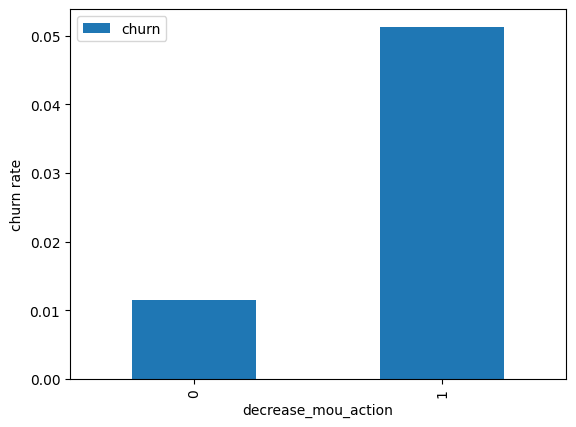

In [81]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.legend()
plt.show()

##### Observation
We can see that the churn rate is higher among the customers, whose minutes of usage(mou) decreased in the action phase than the good phase. 

##### Churn rate on the basis whether the customer decreased her/his number of recharge in action month

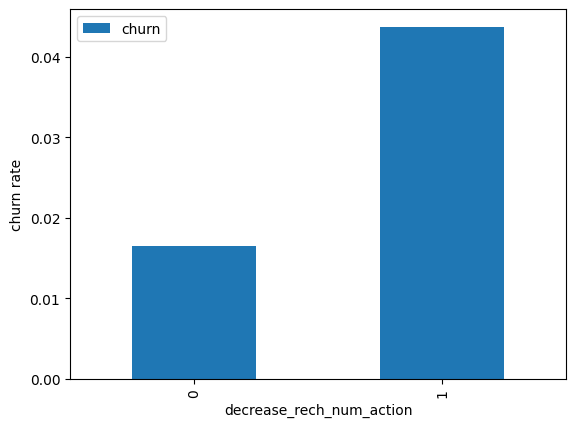

In [82]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Observation***

Similarly, the churn rate is also higher among the customers, whose frequency of recharge in the action phase is lower than the number in good phase.

##### Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

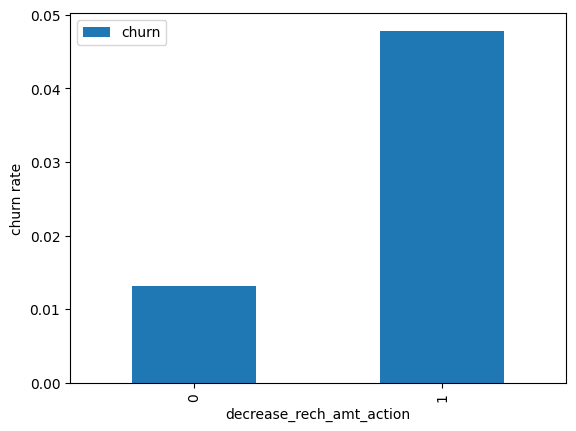

In [83]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

##### Observation

Here also we see the same behaviour. The churn rate is significantly higher among the customers, whose amount of recharge in the action phase is lower than the amount in good phase.

##### Churn rate on the basis whether the customer decreased her/his volume based cost in action month

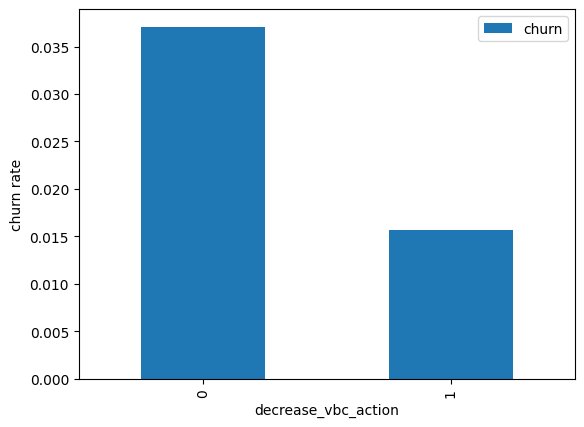

In [84]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Observation***

Here we see the expected result. The churn rate is much higher among the customers whose volume based cost in action month increased. That means the customers do not do the monthly recharge more when they are in the action phase.

##### Analysis of the average revenue per customer (churn and not churn) in the action phase

In [85]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

In [86]:
# Distribution plot
ax = sns.distplot(data_churn['arpu_8'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['arpu_8'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')
plt.legend()

Text(0.5, 1.0, 'Average Revenue Per Customers Among Churners and Non Churners')

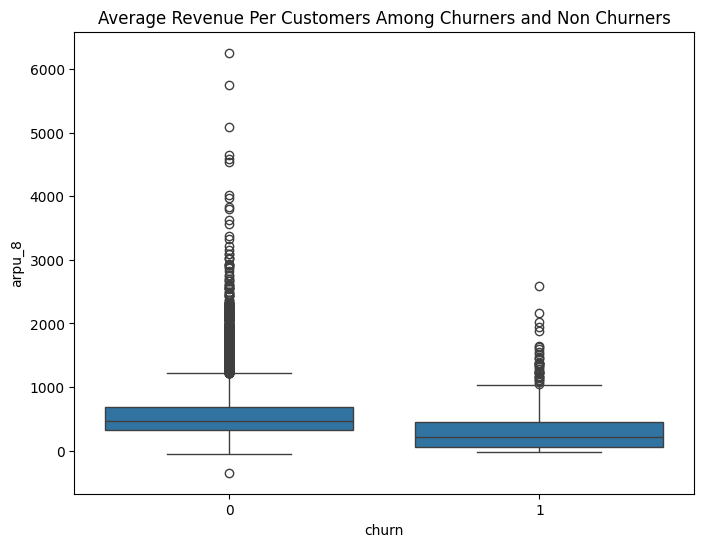

In [87]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="churn", y="arpu_8", data=data)
plt.title("Average Revenue Per Customers Among Churners and Non Churners")

##### Observation:
- Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned. 
- ARPU for the not churned customers is mostly densed on the 0 to 1000.
- Also, the average revenue per customers among churners is lower than that in non churners.

##### Analysis of the minutes of usage MOU (churn and not churn) in the action phase

Text(0.5, 1.0, 'Minutes of usage (MOU) in the action phase Among Churners and Non Churners')

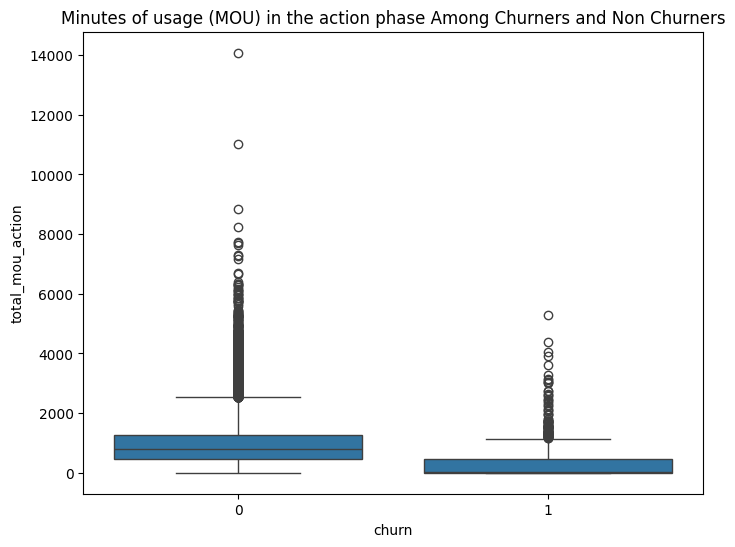

In [88]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="churn", y="total_mou_action", data=data)
plt.title("Minutes of usage (MOU) in the action phase Among Churners and Non Churners")

##### Observation
The average Minutes of usage(MOU) of the churn customers is lower than that of the non churn customers. In other words, the churners tend to reduce the MOU in action phase.

### Bivariate analysis

##### Analysis of decreasing recharge amount and number of recharge in the action phase

In [89]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="churn", y="total_rech_num_8", data=data)
plt.title("Frequency of recharge in action phase")
plt.subplot(1, 2, 2)
sns.boxplot(x="churn", y="total_rech_amt_8", data=data)
plt.title("Average recharged amount in action phase")
plt.tight_layout()  # Adjusts spacing between plots
plt.show()

##### Observation:
Looking at the above chart, we can see that there is a decrease in both frequency and average amount recharge among churners compared to non churners.

##### Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

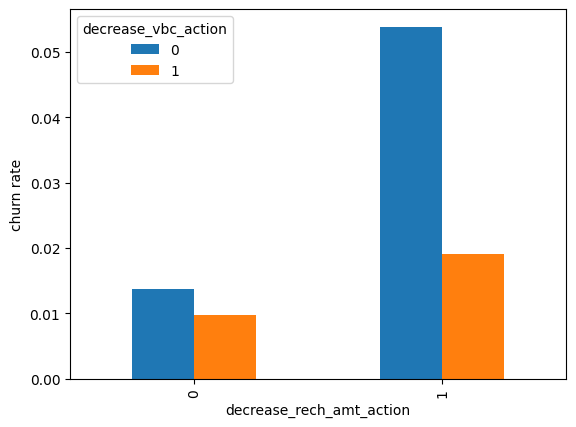

In [90]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

##### Observation:
Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

##### Analysis of recharge amount and number of recharge in action month

In [91]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='total_rech_num_8',y='total_rech_amt_8', hue='churn', data=data)
plt.legend()
plt.show()

##### Observation:
We can see from the above pattern that the recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharge.

#### Dropping few derived columns, which are not required in further analysis

In [92]:
data = data.drop(['ave_mou_good','total_mou_action','diff_mou','avg_rech_num_good','diff_rech_num','avg_rech_amt_good',
                 'diff_rech_amt','avg_arpu_good','diff_arpu','avg_vbc_3g_good','diff_vbc','avg_rech_amt_6_7'], axis=1)

In [93]:
data = data.drop(['mobile_number'], axis=1)

In [94]:
data.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
8              0.0             0.0             0.0  378.721  492.223  137.362   
13             0.0             0.0             0.0  492.846  205.671  593.260   
16             0.0             0.0             0.0  430.975  299.869  187.894   
17             0.0             0.0             0.0  690.008   18.980   25.499   
21             0.0             0.0             0.0  514.453  597.753  637.760   

    onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
8        413.69       351.03        35.08         94.66         80.63   
13       501.76       108.39       534.24        413.31        119.28   
16        50.51        74.01        70.61        296.29        229.74   
17      1185.91         9.28         7.79         61.64          0.00   
21       102.41       132.11        85.14        757.93        896.68   

    offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
8         136.48           0.00           0.00           0.00           0.00   
13        482.46          23.53         144.24          72.11           7.98   
16        162.76           0.00           2.83           0.00           0.00   
17          5.54           0.00           4.76           4.81           0.00   
21        983.39           0.00           0.00           0.00           0.00   

    roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
8            0.00           0.00            297.13            217.59   
13          35.26           1.44             49.63              6.19   
16          17.74           0.00             42.61             65.16   
17           8.46          13.34             38.99              0.00   
21           0.00           0.00              4.48              6.16   

    loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
8              12.49             80.96             70.58             50.54   
13             36.01            151.13             47.28            294.46   
16             67.38            273.29            145.99            128.28   
17              0.00             58.54              0.00              0.00   
21             23.34             91.81             87.93            104.81   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
8               0.00              0.00              0.00               0.0   
13              4.54              0.00             23.51               0.0   
16              0.00              4.48             10.26               0.0   
17              0.00              0.00              0.00               0.0   
21              0.75              0.00              1.58               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
8                0.0              7.15        378.09        288.18   
13               0.0              0.49        205.31         53.48   
16               0.0              0.00        315.91        215.64   
17               0.0              0.00         97.54          0.00   
21               0.0              0.00         97.04         94.09   

    loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
8          63.04            116.56            133.43             22.58   
13        353.99            446.41             85.98            498.23   
16        205.93              7.89              2.58              3.23   
17          0.00           1146.91              0.81              0.00   
21        129.74             97.93            125.94             61.79   

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
8              13.69             10.04             75.69               0.0   
13            255.36             52.94            156.94               0.0   
16             22.99             64.51             18.29               0.0   
17              1.55              0.00          

In [95]:
data.corr().round(2)

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
loc_og_t2o_mou                       NaN             NaN             NaN   
std_og_t2o_mou                       NaN             NaN             NaN   
loc_ic_t2o_mou                       NaN             NaN             NaN   
arpu_6                               NaN             NaN             NaN   
arpu_7                               NaN             NaN             NaN   
...                                  ...             ...             ...   
decrease_mou_action                  NaN             NaN             NaN   
decrease_rech_num_action             NaN             NaN             NaN   
decrease_rech_amt_action             NaN             NaN             NaN   
decrease_arpu_action                 NaN             NaN             NaN   
decrease_vbc_action                  NaN             NaN             NaN   

                          arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  \
loc_og_t2o_mou               NaN     NaN     NaN          NaN          NaN   
std_og_t2o_mou               NaN     NaN     NaN          NaN          NaN   
loc_ic_t2o_mou               NaN     NaN     NaN          NaN          NaN   
arpu_6                      1.00    0.49    0.42         0.36         0.18   
arpu_7                      0.49    1.00    0.63         0.18         0.35   
...                          ...     ...     ...          ...          ...   
decrease_mou_action         0.13   -0.05   -0.32         0.10        -0.01   
decrease_rech_num_action    0.12   -0.02   -0.29         0.02        -0.04   
decrease_rech_amt_action    0.11   -0.06   -0.44         0.06        -0.04   
decrease_arpu_action        0.16   -0.02   -0.48         0.08        -0.03   
decrease_vbc_action         0.10    0.06    0.02        -0.11        -0.11   

                          onnet_mou_8  offnet_mou_6  offnet_mou_7  \
loc_og_t2o_mou                    NaN           NaN           NaN   
std_og_t2o_mou                    NaN           NaN           NaN   
loc_ic_t2o_mou                    NaN           NaN           NaN   
arpu_6                           0.14          0.53          0.28   
arpu_7                           0.29          0.30          0.52   
...                               ...           ...           ...   
decrease_mou_action             -0.21          0.13         -0.01   
decrease_rech_num_action        -0.17          0.04         -0.05   
decrease_rech_amt_action        -0.20          0.08         -0.04   
decrease_arpu_action            -0.20          0.09         -0.04   
decrease_vbc_action             -0.09         -0.08         -0.09   

                          offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
loc_og_t2o_mou                     NaN            NaN            NaN   
std_og_t2o_mou                     NaN            NaN            NaN   
loc_ic_t2o_mou                     NaN            NaN            NaN   
arpu_6                            0.24           0.10           0.06   
arpu_7                            0.40           0.08           0.08   
...                                ...            ...            ...   
decrease_mou_action              -0.26          -0.09          -0.04   
decrease_rech_num_action         -0.20          -0.01          -0.00   
decrease_rech_amt_action         -0.25          -0.01           0.01   
decrease_arpu_action             -0.26          -0.01           0.00   
decrease_vbc_action              -0.07           0.00           0.01   

                          roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
loc_og_t2o_mou                      NaN            NaN            NaN   
std_og_t2o_mou                      NaN            NaN            NaN   
loc_ic_t2o_mou                      NaN            NaN            NaN   
arpu_6                             0.08           0.17           0.10   
arpu_7                             0.08           0.11           0.16   
...                                 ...     

In [96]:
# Remove the identical columns: loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou
data = data.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis=1)

In [97]:
data.corr().round(2)

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                      1.00    0.49    0.42         0.36         0.18   
arpu_7                      0.49    1.00    0.63         0.18         0.35   
arpu_8                      0.42    0.63    1.00         0.12         0.23   
onnet_mou_6                 0.36    0.18    0.12         1.00         0.73   
onnet_mou_7                 0.18    0.35    0.23         0.73         1.00   
...                          ...     ...     ...          ...          ...   
decrease_mou_action         0.13   -0.05   -0.32         0.10        -0.01   
decrease_rech_num_action    0.12   -0.02   -0.29         0.02        -0.04   
decrease_rech_amt_action    0.11   -0.06   -0.44         0.06        -0.04   
decrease_arpu_action        0.16   -0.02   -0.48         0.08        -0.03   
decrease_vbc_action         0.10    0.06    0.02        -0.11        -0.11   

                          onnet_mou_8  offnet_mou_6  offnet_mou_7  \
arpu_6                           0.14          0.53          0.28   
arpu_7                           0.29          0.30          0.52   
arpu_8                           0.39          0.23          0.36   
onnet_mou_6                      0.60         -0.02         -0.07   
onnet_mou_7                      0.80         -0.06         -0.02   
...                               ...           ...           ...   
decrease_mou_action             -0.21          0.13         -0.01   
decrease_rech_num_action        -0.17          0.04         -0.05   
decrease_rech_amt_action        -0.20          0.08         -0.04   
decrease_arpu_action            -0.20          0.09         -0.04   
decrease_vbc_action             -0.09         -0.08         -0.09   

                          offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
arpu_6                            0.24           0.10           0.06   
arpu_7                            0.40           0.08           0.08   
arpu_8                            0.57           0.08           0.05   
onnet_mou_6                      -0.05           0.00           0.01   
onnet_mou_7                      -0.02           0.02          -0.01   
...                                ...            ...            ...   
decrease_mou_action              -0.26          -0.09          -0.04   
decrease_rech_num_action         -0.20          -0.01          -0.00   
decrease_rech_amt_action         -0.25          -0.01           0.01   
decrease_arpu_action             -0.26          -0.01           0.00   
decrease_vbc_action              -0.07           0.00           0.01   

                          roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
arpu_6                             0.08           0.17           0.10   
arpu_7                             0.08           0.11           0.16   
arpu_8                             0.09           0.12           0.11   
onnet_mou_6                        0.03           0.04           0.05   
onnet_mou_7                        0.02           0.06           0.04   
...                                 ...            ...            ...   
decrease_mou_action                0.05          -0.11          -0.05   
decrease_rech_num_action          -0.01          -0.01          -0.01   
decrease_rech_amt_action          -0.02          -0.00           0.01   
decrease_arpu_action              -0.02          -0.00           0.01   
decrease_vbc_action                0.01          -0.02          -0.02   

                          roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
arpu_6                             0.11              0.17              0.12   
arpu_7                             0.15              0.09              0.16   
arpu_8                             0.20              0.08              0.12   
onnet_mou_6                        0.06              0.46              0.36   
onnet_mou_7                        0.06              0.35              0.48   
...                                 ...     

In [98]:
# Continue to remove identical columns
data = data.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8'], axis=1)

In [99]:
data.corr().round(2)

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                      1.00    0.49    0.42         0.36         0.18   
arpu_7                      0.49    1.00    0.63         0.18         0.35   
arpu_8                      0.42    0.63    1.00         0.12         0.23   
onnet_mou_6                 0.36    0.18    0.12         1.00         0.73   
onnet_mou_7                 0.18    0.35    0.23         0.73         1.00   
...                          ...     ...     ...          ...          ...   
decrease_mou_action         0.13   -0.05   -0.32         0.10        -0.01   
decrease_rech_num_action    0.12   -0.02   -0.29         0.02        -0.04   
decrease_rech_amt_action    0.11   -0.06   -0.44         0.06        -0.04   
decrease_arpu_action        0.16   -0.02   -0.48         0.08        -0.03   
decrease_vbc_action         0.10    0.06    0.02        -0.11        -0.11   

                          onnet_mou_8  offnet_mou_6  offnet_mou_7  \
arpu_6                           0.14          0.53          0.28   
arpu_7                           0.29          0.30          0.52   
arpu_8                           0.39          0.23          0.36   
onnet_mou_6                      0.60         -0.02         -0.07   
onnet_mou_7                      0.80         -0.06         -0.02   
...                               ...           ...           ...   
decrease_mou_action             -0.21          0.13         -0.01   
decrease_rech_num_action        -0.17          0.04         -0.05   
decrease_rech_amt_action        -0.20          0.08         -0.04   
decrease_arpu_action            -0.20          0.09         -0.04   
decrease_vbc_action             -0.09         -0.08         -0.09   

                          offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
arpu_6                            0.24           0.10           0.06   
arpu_7                            0.40           0.08           0.08   
arpu_8                            0.57           0.08           0.05   
onnet_mou_6                      -0.05           0.00           0.01   
onnet_mou_7                      -0.02           0.02          -0.01   
...                                ...            ...            ...   
decrease_mou_action              -0.26          -0.09          -0.04   
decrease_rech_num_action         -0.20          -0.01          -0.00   
decrease_rech_amt_action         -0.25          -0.01           0.01   
decrease_arpu_action             -0.26          -0.01           0.00   
decrease_vbc_action              -0.07           0.00           0.01   

                          roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
arpu_6                             0.08           0.17           0.10   
arpu_7                             0.08           0.11           0.16   
arpu_8                             0.09           0.12           0.11   
onnet_mou_6                        0.03           0.04           0.05   
onnet_mou_7                        0.02           0.06           0.04   
...                                 ...            ...            ...   
decrease_mou_action                0.05          -0.11          -0.05   
decrease_rech_num_action          -0.01          -0.01          -0.01   
decrease_rech_amt_action          -0.02          -0.00           0.01   
decrease_arpu_action              -0.02          -0.00           0.01   
decrease_vbc_action                0.01          -0.02          -0.02   

                          roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
arpu_6                             0.11              0.17              0.12   
arpu_7                             0.15              0.09              0.16   
arpu_8                             0.20              0.08              0.12   
onnet_mou_6                        0.06              0.46              0.36   
onnet_mou_7                        0.06              0.35              0.48   
...                                 ...     

In [100]:
# Continue to remove identical columns
data = data.drop(['std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis=1)

In [101]:
data.corr().round(2)

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                      1.00    0.49    0.42         0.36         0.18   
arpu_7                      0.49    1.00    0.63         0.18         0.35   
arpu_8                      0.42    0.63    1.00         0.12         0.23   
onnet_mou_6                 0.36    0.18    0.12         1.00         0.73   
onnet_mou_7                 0.18    0.35    0.23         0.73         1.00   
...                          ...     ...     ...          ...          ...   
decrease_mou_action         0.13   -0.05   -0.32         0.10        -0.01   
decrease_rech_num_action    0.12   -0.02   -0.29         0.02        -0.04   
decrease_rech_amt_action    0.11   -0.06   -0.44         0.06        -0.04   
decrease_arpu_action        0.16   -0.02   -0.48         0.08        -0.03   
decrease_vbc_action         0.10    0.06    0.02        -0.11        -0.11   

                          onnet_mou_8  offnet_mou_6  offnet_mou_7  \
arpu_6                           0.14          0.53          0.28   
arpu_7                           0.29          0.30          0.52   
arpu_8                           0.39          0.23          0.36   
onnet_mou_6                      0.60         -0.02         -0.07   
onnet_mou_7                      0.80         -0.06         -0.02   
...                               ...           ...           ...   
decrease_mou_action             -0.21          0.13         -0.01   
decrease_rech_num_action        -0.17          0.04         -0.05   
decrease_rech_amt_action        -0.20          0.08         -0.04   
decrease_arpu_action            -0.20          0.09         -0.04   
decrease_vbc_action             -0.09         -0.08         -0.09   

                          offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
arpu_6                            0.24           0.10           0.06   
arpu_7                            0.40           0.08           0.08   
arpu_8                            0.57           0.08           0.05   
onnet_mou_6                      -0.05           0.00           0.01   
onnet_mou_7                      -0.02           0.02          -0.01   
...                                ...            ...            ...   
decrease_mou_action              -0.26          -0.09          -0.04   
decrease_rech_num_action         -0.20          -0.01          -0.00   
decrease_rech_amt_action         -0.25          -0.01           0.01   
decrease_arpu_action             -0.26          -0.01           0.00   
decrease_vbc_action              -0.07           0.00           0.01   

                          roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
arpu_6                             0.08           0.17           0.10   
arpu_7                             0.08           0.11           0.16   
arpu_8                             0.09           0.12           0.11   
onnet_mou_6                        0.03           0.04           0.05   
onnet_mou_7                        0.02           0.06           0.04   
...                                 ...            ...            ...   
decrease_mou_action                0.05          -0.11          -0.05   
decrease_rech_num_action          -0.01          -0.01          -0.01   
decrease_rech_amt_action          -0.02          -0.00           0.01   
decrease_arpu_action              -0.02          -0.00           0.01   
decrease_vbc_action                0.01          -0.02          -0.02   

                          roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
arpu_6                             0.11              0.17              0.12   
arpu_7                             0.15              0.09              0.16   
arpu_8                             0.20              0.08              0.12   
onnet_mou_6                        0.06              0.46              0.36   
onnet_mou_7                        0.06              0.35              0.48   
...                                 ...     

In [102]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.width', None)  # Disable line wrapping (auto)
pd.set_option('display.max_colwidth', None)  # No truncation of column values

In [103]:
data.corr().round(2)

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                      1.00    0.49    0.42         0.36         0.18   
arpu_7                      0.49    1.00    0.63         0.18         0.35   
arpu_8                      0.42    0.63    1.00         0.12         0.23   
onnet_mou_6                 0.36    0.18    0.12         1.00         0.73   
onnet_mou_7                 0.18    0.35    0.23         0.73         1.00   
onnet_mou_8                 0.14    0.29    0.39         0.60         0.80   
offnet_mou_6                0.53    0.30    0.23        -0.02        -0.06   
offnet_mou_7                0.28    0.52    0.36        -0.07        -0.02   
offnet_mou_8                0.24    0.40    0.57        -0.05        -0.02   
roam_ic_mou_6               0.10    0.08    0.08         0.00         0.02   
roam_ic_mou_7               0.06    0.08    0.05         0.01        -0.01   
roam_ic_mou_8               0.08    0.08    0.09         0.03         0.02   
roam_og_mou_6               0.17    0.11    0.12         0.04         0.06   
roam_og_mou_7               0.10    0.16    0.11         0.05         0.04   
roam_og_mou_8               0.11    0.15    0.20         0.06         0.06   
loc_og_t2t_mou_6            0.17    0.09    0.08         0.46         0.35   
loc_og_t2t_mou_7            0.12    0.16    0.12         0.36         0.48   
loc_og_t2t_mou_8            0.11    0.14    0.18         0.31         0.40   
loc_og_t2m_mou_6            0.36    0.19    0.19        -0.06        -0.09   
loc_og_t2m_mou_7            0.24    0.31    0.26        -0.08        -0.07   
loc_og_t2m_mou_8            0.22    0.26    0.38        -0.08        -0.08   
loc_og_t2f_mou_6            0.14    0.10    0.11        -0.07        -0.08   
loc_og_t2f_mou_7            0.10    0.13    0.12        -0.08        -0.07   
loc_og_t2f_mou_8            0.09    0.11    0.15        -0.08        -0.07   
loc_og_t2c_mou_6            0.06    0.01   -0.00         0.04         0.03   
loc_og_t2c_mou_7            0.01    0.06    0.03         0.02         0.05   
loc_og_t2c_mou_8            0.01    0.05    0.07         0.03         0.06   
loc_og_mou_6                0.35    0.18    0.18         0.26         0.16   
loc_og_mou_7                0.23    0.32    0.25         0.19         0.27   
loc_og_mou_8                0.21    0.26    0.37         0.14         0.20   
std_og_t2t_mou_6            0.29    0.14    0.07         0.83         0.60   
std_og_t2t_mou_7            0.12    0.29    0.18         0.59         0.83   
std_og_t2t_mou_8            0.09    0.23    0.31         0.49         0.67   
std_og_t2m_mou_6            0.33    0.20    0.11         0.02         0.00   
std_og_t2m_mou_7            0.15    0.36    0.22        -0.02         0.03   
std_og_t2m_mou_8            0.12    0.27    0.38        -0.01         0.03   
std_og_t2f_mou_6            0.06    0.04    0.04        -0.04        -0.04   
std_og_t2f_mou_7            0.04    0.07    0.05        -0.04        -0.04   
std_og_t2f_mou_8            0.04    0.05    0.07        -0.04        -0.04   
std_og_mou_6                0.42    0.23    0.12         0.58         0.41   
std_og_mou_7                0.18    0.44    0.27         0.39         0.58   
std_og_mou_8                0.14    0.34    0.47         0.32         0.46   
isd_og_mou_6                0.12    0.07    0.08        -0.03        -0.03   
isd_og_mou_7                0.08    0.15    0.10        -0.04        -0.03   
isd_og_mou_8                0.07    0.09    0.19        -0.03        -0.02   
spl_og_mou_6                0.12    0.04    0.02         0.08         0.05   
spl_og_mou_7                0.03    0.10    0.05         0.06         0.11   
spl_og_mou_8                0.04    0.07    0.10         0.06         0.09   
og_others_6                 0.11    0.03    0.01         0.08         0.04   
og_others_7                 0.01    0.02    0.00         0.00         0.00   
og_others_8                -0.01    0.00    0.00

In [104]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(data.corr(),annot = True)
plt.show()

# Step 5: Train_Test_Split

In [105]:
# Import library
from sklearn.model_selection import train_test_split

In [106]:
# Putting feature variables into X
X = data.drop(['churn'], axis=1)

In [107]:
X.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
8   378.721  492.223  137.362       413.69       351.03        35.08   
13  492.846  205.671  593.260       501.76       108.39       534.24   
16  430.975  299.869  187.894        50.51        74.01        70.61   
17  690.008   18.980   25.499      1185.91         9.28         7.79   
21  514.453  597.753  637.760       102.41       132.11        85.14   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   
21        757.93        896.68        983.39           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   
21           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   
21              1.58               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8              75.69               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16             18.29               0.0               0.0               0.0   
17              0.00               0.0               0.0               0.0   
21            876.99               0.0     

In [108]:
# Putting target variable to y
y = data['churn']

In [109]:
y.head()

8     0
13    0
16    0
17    0
21    0
Name: churn, dtype: int64

In [110]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with data imbalance

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [111]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [112]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [113]:
# Fitting SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

  File "C:\Users\60002560\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\60002560\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\60002560\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
       

### Feature Scaling

In [114]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [115]:
# Instantiate the Scaler
scaler = StandardScaler()

In [116]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')
cols_scale

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [117]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [118]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  0.140777 -0.522792 -0.276289     0.106540    -0.662084    -0.465777   
1 -1.427243  4.428047  3.254270    -0.658491    -0.236590    -0.004450   
2 -0.222751  0.543206  0.809117    -0.601239    -0.599206    -0.331043   
3 -0.911173  0.842273  0.731302    -0.702232    -0.650471    -0.458464   
4  0.271356  0.247684  1.256421    -0.356392    -0.180394     0.114727   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     -0.211202     -0.636415      0.317224      -0.254996      -0.001208   
1     -0.776075      2.523985      2.732154      -0.254996      -0.253231   
2     -0.363395     -0.495976     -0.028236      -0.254996      -0.253231   
3     -0.789784     -0.654483     -0.519047      -0.254996      -0.253231   
4      0.899204      0.904465      1.255807      -0.231882      -0.253231   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.235211      -0.300833      -0.374857      -0.412810   
1      -0.304660      -0.300833      -0.374857      -0.431026   
2      -0.304660      -0.300833      -0.374857      -0.431026   
3      -0.304660      -0.300833      -0.374857      -0.431026   
4      -0.304660      -0.202644      -0.374857      -0.431026   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         -0.263308         -0.311548         -0.251411          0.485770   
1         -0.201396          0.270791          0.198344         -0.529474   
2          0.077694         -0.095916          0.228431          0.605362   
3         -0.192289         -0.181513         -0.064925         -0.371787   
4          0.128384          0.784682          1.062326          1.423002   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.190660         -0.399182         -0.256866         -0.267401   
1          1.106670          0.288951         -0.276320         -0.267401   
2          0.258376          0.908270          1.475098          0.451689   
3         -0.205099         -0.251524         -0.157090          0.216496   
4          0.996094          1.845573          0.780430          1.055332   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0         -0.244832         -0.191587         -0.267368         -0.244432   
1         -0.244832         -0.191587         -0.267368         -0.244432   
2         -0.131562         -0.191587         -0.267368         -0.244432   
3         -0.244832          1.002136          2.438345          2.557369   
4          0.519904          1.811266         -0.267368          0.843143   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0      0.129144     -0.335468     -0.418749          0.254982   
1     -0.477059      0.843930      0.290569         -0.570615   
2      0.512549      0.121104      0.710496         -0.618738   
3     -0.364845     -0.233086     -0.212616         -0.619956   
4      1.025297      1.183543      1.843624         -0.414192   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0         -0.528622         -0.338018         -0.342394         -0.504282   
1         -0.320253         -0.041333         -0.512504          2.294191   
2         -0.551860         -0.420186         -0.617043         -0.571393   
3         -0.570510         -0.420186         -0.621707         -0.578677   
4         -0.474892         -0.327001          0.357250          0.585026   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0          0.650664         -0.143576         -0.139257         -0.119299   
1          3.087483         -0.143576         -0.139257         -0.119299   
2         -0.416795         -0.143576         -0.139257         -0.067469   
3         -0.406309         -0.143576         -0.139257         -0.119299   
4          0.555984         -0.143576         -0.139257         -0.119299   



##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [119]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
5704   0.244310 -0.268832  1.005890    -0.725286    -0.690223    -0.476634   
64892  0.048359 -0.779609 -0.157969    -0.734066    -0.698072    -0.502219   
39613  0.545470  0.184388  1.403349    -0.537110    -0.521615    -0.206890   
93118  0.641508  0.816632 -0.211023    -0.058843     0.029897    -0.155872   
81235  3.878627  0.911619  2.745295     4.117829     1.452446     2.809582   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
5704       0.483540      0.307300      2.323745      -0.077655      -0.253231   
64892     -0.358555     -0.577717     -0.256061       0.022864      -0.253231   
39613      0.694901      0.435043      1.465067      -0.254996      -0.253231   
93118     -0.148197     -0.143451     -0.410827      -0.254996      -0.253231   
81235     -0.002634     -0.290323      0.029332      -0.254996      -0.253231   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
5704       -0.304660       0.215992      -0.374857      -0.431026   
64892      -0.304660      -0.120122      -0.374857      -0.431026   
39613      -0.304660      -0.300833      -0.374857      -0.431026   
93118      -0.304660      -0.300833      -0.374857      -0.431026   
81235      -0.003778      -0.300833      -0.374857       1.456232   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
5704          -0.278217         -0.282623         -0.106758          0.028192   
64892         -0.278380         -0.302589         -0.174571         -0.300150   
39613          0.254268          0.146234          0.514266          2.795255   
93118          0.871759          1.002772          0.222587          0.871444   
81235          2.888120          0.289221          1.362336          0.767176   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
5704           0.006336          0.034141         -0.087435         -0.267401   
64892         -0.204014         -0.295881         -0.261886         -0.267401   
39613          2.186811          3.743713          0.011714         -0.076422   
93118          0.713384         -0.116066          1.669630          1.311405   
81235          0.540001          0.742988          0.005438         -0.267401   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
5704          -0.244832          0.037799         -0.267368         -0.244432   
64892         -0.244832         -0.191587         -0.267368         -0.244432   
39613          1.174644         -0.191587         -0.267368         -0.244432   
93118          0.642996         -0.191587         -0.267368         -0.244432   
81235         -0.244832         -0.191587         -0.267368         -0.244432   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
5704      -0.161248     -0.195270     -0.055078         -0.610819   
64892     -0.379084     -0.337876     -0.306653         -0.619956   
39613      1.932970      1.438327      2.763270         -0.619956   
93118      1.189608      1.165755      0.093205         -0.358067   
81235      2.297311      0.506959      1.278083          3.237049   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
5704          -0.570510         -0.420186          0.346789          0.369671   
64892         -0.570510         -0.415897         -0.231854         -0.437192   
39613         -0.570510         -0.420186         -0.394991         -0.343132   
93118         -0.342850         -0.221957         -0.507976         -0.406765   
81235          1.462701          2.078469         -0.263825         -0.435005   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
5704           2.702104         -0.143576         -0.139257         -0.119299   
64892         -0.040526         -0.143576         -0.139257         -0.104326   
39613         -0.177784         

# Step 6: Building Models

## Logistic regression

In [120]:
##### Importing stats model
import statsmodels.api as sm

In [121]:
# Instantiate the model
# Adding the constant to X_train
log = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [122]:
# Fit the model
log = log.fit().summary()

In [123]:
# Summary
log

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42720
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 10 Mar 2025   Deviance:                       23381.
Time:                        08:25:17   Pearson chi2:                 2.63e+05
No. Iterations:                    40   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -52.2399   4218.833     -0.012      0.990   -8321.001    8216.521
arpu_6                       0.0494      0.078      0.632      0.527      -0.104       0.203
arpu_7                       0.2255      0.088      2.577      0.010       0.054       0.397
arpu_8                      -0.0005      0.115     -0.004      0.996      -0.226       0.225
onnet_mou_6                 15.5746      3.583      4.346      0.000       8.551      22.598
onnet_mou_7                 -0.7902      2.036     -0.388      0.698      -4.781       3.201
onnet_mou_8                  0.1989      1.790      0.111      0.912      -3.310       3.708
offnet_mou_6                15.1554      3.372      4.495      0.000       8.547      21.764
offnet_mou_7                 1.4115      1.936      0.729      0.466      -2.384       5.207
offnet_mou_8                -1.9757      1.846     -1.070      0.284      -5.593       1.642
roam_ic_mou_6                0.1664      0.035      4.783      0.000       0.098       0.235
roam_ic_mou_7                0.0160      0.051      0.316      0.752      -0.083       0.115
roam_ic_mou_8                0.1428      0.043      3.293      0.001       0.058       0.228
roam_og_mou_6               -5.0740      1.134     -4.473      0.000      -7.297      -2.851
roam_og_mou_7               -0.0476      0.532     -0.089      0.929      -1.091       0.996
roam_og_mou_8                0.5825      0.520      1.119      0.263      -0.438       1.603
loc_og_t2t_mou_6         -2912.9329    659.322     -4.418      0.000   -4205.180   -1620.686
loc_og_t2t_mou_7         -1449.1913    686.335     -2.111      0.035   -2794.383    -103.999
loc_og_t2t_mou_8          4128.0323    630.436      6.548      0.000    2892.401    5363.663
loc_og_t2m_mou_6         -2947.9880    667.110     -4.419      0.000   -4255.499   -1640.477
loc_og_t2m_mou_7         -1368.0323    647.283     -2.113      0.035   -2636.684     -99.380
loc_og_t2m_mou_8          4405.9973    672.696      6.550      0.000    3087.536    5724.458
loc_og_t2f_mou_6          -251.5327     56.964     -4.416      0.000    -363.180    -139.886
loc_og_t2f_mou_7          -120.9034     57.223     -2.113      0.035    -233.058      -8.749
loc_og_t2f_mou_8           364.6972     55.720      6.545      0.000     255.487     473.907
loc_og_t2c_mou_6             0.0464      0.021      2.186      0.029       0.005       0.088
loc_og_t2c_mou_7            -0.0010      0.023     -0.042      0.966      -0.045       0.044
loc_og_t2c_mou_8             0.0608      0.023      2.697      0.007       0.017       0.105
loc_og_mou_6              3321.2322   1275.958      2.603      0.009     820.401    5822.063
loc_og_mou_7              6398.6174   1341.648      4.769      0.000    3769.036    9028.199
loc_og_mou_8  

##### Observation
1. We can see that there are few features have positive coefficients and few have negative.
2. There are many factors having p_value >0.05.
3. There are also so many factors in the list which is hard to define which one is top contributors.

##### Coarse tuning (Auto+Manual)

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection Using RFE

In [124]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

#### RFE with 15 columns

In [125]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [126]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'og_others_8',
       'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8',
       'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action'],
      dtype='object')


### Model-1 with RFE selected columns

In [127]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_1 = log_1.fit()

log_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42834
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 10 Mar 2025   Deviance:                       30021.
Time:                        08:27:55   Pearson chi2:                 3.30e+06
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -53.0767   4234.139     -0.013      0.990   -8351.836    8245.683
offnet_mou_7            0.6242      0.026     24.102      0.000       0.573       0.675
offnet_mou_8           -2.4969      0.110    -22.638      0.000      -2.713      -2.281
roam_og_mou_8           1.0382      0.032     32.487      0.000       0.976       1.101
std_og_t2t_mou_7        0.5178      0.025     20.826      0.000       0.469       0.567
std_og_t2m_mou_8        2.1850      0.093     23.423      0.000       2.002       2.368
isd_og_mou_8           -0.9531      0.182     -5.247      0.000      -1.309      -0.597
og_others_7            -1.0070      0.738     -1.364      0.173      -2.454       0.440
og_others_8         -3794.7047   3.08e+05     -0.012      0.990   -6.08e+05       6e+05
total_og_mou_8         -0.9098      0.038    -23.865      0.000      -0.985      -0.835
loc_ic_mou_8           -2.1873      0.064    -34.415      0.000      -2.312      -2.063
std_ic_t2f_mou_8       -0.6864      0.072     -9.510      0.000      -0.828      -0.545
ic_others_8            -1.3946      0.128    -10.931      0.000      -1.645      -1.144
monthly_2g_8           -0.8818      0.044    -20.173      0.000      -0.967      -0.796
monthly_3g_8           -0.9449      0.043    -21.766      0.000      -1.030      -0.860
decrease_vbc_action    -1.3185      0.062    -21.288      0.000      -1.440      -1.197
=======================================================================================
"""

#### Checking VIFs

In [128]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1          offnet_mou_8  10.11
4      std_og_t2m_mou_8   6.33
8        total_og_mou_8   3.93
0          offnet_mou_7   1.94
3      std_og_t2t_mou_7   1.70
9          loc_ic_mou_8   1.53
2         roam_og_mou_8   1.27
14  decrease_vbc_action   1.09
12         monthly_2g_8   1.06
13         monthly_3g_8   1.06
7           og_others_8   1.05
6           og_others_7   1.04
10     std_ic_t2f_mou_8   1.02
11          ic_others_8   1.02
5          isd_og_mou_8   1.01

##### Removing column `og_others_8` as it has the highest p-value 0.99

In [130]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2t_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action']


### Model-2
Building the model after removing og_others_8 variable.

In [131]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_2 = log_2.fit()

log_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42835
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15045.
Date:                Mon, 10 Mar 2025   Deviance:                       30091.
Time:                        08:27:57   Pearson chi2:                 3.27e+06
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4954
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.9764      0.030    -32.286      0.000      -1.036      -0.917
offnet_mou_7            0.6230      0.026     24.091      0.000       0.572       0.674
offnet_mou_8           -2.4990      0.110    -22.681      0.000      -2.715      -2.283
roam_og_mou_8           1.0380      0.032     32.633      0.000       0.976       1.100
std_og_t2t_mou_7        0.5171      0.025     20.821      0.000       0.468       0.566
std_og_t2m_mou_8        2.1862      0.093     23.461      0.000       2.004       2.369
isd_og_mou_8           -1.0364      0.189     -5.492      0.000      -1.406      -0.667
og_others_7            -1.5889      0.731     -2.174      0.030      -3.021      -0.157
total_og_mou_8         -0.9103      0.038    -23.890      0.000      -0.985      -0.836
loc_ic_mou_8           -2.1849      0.063    -34.412      0.000      -2.309      -2.060
std_ic_t2f_mou_8       -0.6975      0.072     -9.633      0.000      -0.839      -0.556
ic_others_8            -1.3907      0.128    -10.906      0.000      -1.641      -1.141
monthly_2g_8           -0.8862      0.044    -20.171      0.000      -0.972      -0.800
monthly_3g_8           -0.9433      0.043    -21.743      0.000      -1.028      -0.858
decrease_vbc_action    -1.3209      0.062    -21.350      0.000      -1.442      -1.200
=======================================================================================
"""

#### Checking VIF for Model-2

In [132]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1          offnet_mou_8  10.11
4      std_og_t2m_mou_8   6.33
7        total_og_mou_8   3.93
0          offnet_mou_7   1.94
3      std_og_t2t_mou_7   1.70
8          loc_ic_mou_8   1.53
2         roam_og_mou_8   1.27
13  decrease_vbc_action   1.09
12         monthly_3g_8   1.06
11         monthly_2g_8   1.06
9      std_ic_t2f_mou_8   1.02
5          isd_og_mou_8   1.01
10          ic_others_8   1.01
6           og_others_7   1.00

##### Observations:
As we can see from the model summary, `offnet_mou_8` has very high VIF score, so let's remove this factor.

In [133]:
# Removing 'offnet_mou_8' column
log_cols.remove('offnet_mou_8')

### Model-3
Model after removing 'offnet_mou_8' column.

In [134]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_3 = log_3.fit()

log_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42836
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15365.
Date:                Mon, 10 Mar 2025   Deviance:                       30731.
Time:                        08:27:59   Pearson chi2:                 4.61e+06
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4878
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.9762      0.030    -32.032      0.000      -1.036      -0.916
offnet_mou_7            0.4689      0.023     19.979      0.000       0.423       0.515
roam_og_mou_8           0.5967      0.024     25.325      0.000       0.551       0.643
std_og_t2t_mou_7        0.7488      0.025     30.029      0.000       0.700       0.798
std_og_t2m_mou_8        0.3167      0.033      9.723      0.000       0.253       0.380
isd_og_mou_8           -1.1466      0.193     -5.954      0.000      -1.524      -0.769
og_others_7            -1.6873      0.729     -2.315      0.021      -3.116      -0.258
total_og_mou_8         -1.2600      0.038    -32.931      0.000      -1.335      -1.185
loc_ic_mou_8           -2.9608      0.057    -51.923      0.000      -3.073      -2.849
std_ic_t2f_mou_8       -0.7640      0.074    -10.357      0.000      -0.909      -0.619
ic_others_8            -1.3762      0.124    -11.076      0.000      -1.620      -1.133
monthly_2g_8           -0.8935      0.044    -20.244      0.000      -0.980      -0.807
monthly_3g_8           -1.0030      0.046    -21.989      0.000      -1.092      -0.914
decrease_vbc_action    -1.3162      0.061    -21.446      0.000      -1.436      -1.196
=======================================================================================
"""

#### VIF Model-3

In [135]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3      std_og_t2m_mou_8  2.88
6        total_og_mou_8  2.86
0          offnet_mou_7  1.74
2      std_og_t2t_mou_7  1.45
7          loc_ic_mou_8  1.34
12  decrease_vbc_action  1.09
1         roam_og_mou_8  1.06
11         monthly_3g_8  1.06
10         monthly_2g_8  1.06
9           ic_others_8  1.01
8      std_ic_t2f_mou_8  1.01
4          isd_og_mou_8  1.00
5           og_others_7  1.00

##### Observation: 
Now the VIF scores are all below 5. This model is good to proceed to next step.

# Step 7: Evaluating Models

###  Model performance on the train set

In [136]:
# Getting the predicted value on the train set
y_train_pred = log_3.predict(X_train_sm_3)
y_train_pred.head()

0    2.709070e-01
1    1.562694e-01
2    7.255808e-02
3    6.694828e-03
4    1.224697e-17
dtype: float64

##### Creating a dataframe with the actual churn and the predicted probabilities

In [137]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

churn    churn_prob  CustID
0      0  2.709070e-01       0
1      0  1.562694e-01       1
2      0  7.255808e-02       2
3      0  6.694828e-03       3
4      0  1.224697e-17       4

##### Finding Optimal Probablity Cutoff Point

In [138]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

churn    churn_prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0  2.709070e-01       0    1    1    1    0    0    0    0    0    0   
1      0  1.562694e-01       1    1    1    0    0    0    0    0    0    0   
2      0  7.255808e-02       2    1    0    0    0    0    0    0    0    0   
3      0  6.694828e-03       3    1    0    0    0    0    0    0    0    0   
4      0  1.224697e-17       4    1    0    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

##### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [141]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [142]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.755379     0.983664     0.527095
0.2          0.2  0.795426     0.970362     0.620490
0.3          0.3  0.820303     0.950198     0.690408
0.4          0.4  0.839953     0.927608     0.752299
0.5          0.5  0.851645     0.893582     0.809708
0.6          0.6  0.855169     0.846441     0.863897
0.7          0.7  0.846674     0.779743     0.913606
0.8          0.8  0.783384     0.615029     0.951739
0.9          0.9  0.631552     0.285788     0.977316


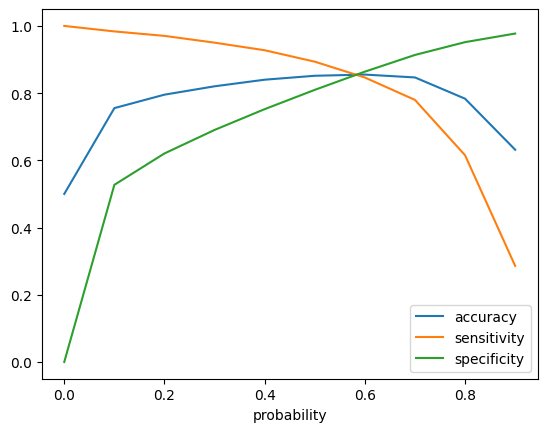

In [143]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

#### Emphasize Sensitivity/Recall than Accuracy
We are more focused on higher Sensitivity/Recall score than the accuracy.
Because we need to care more about churn cases than the not churn cases. The main goal is to retain the customers, who have the possiblity to churn. There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

##### Observations:
- Accuracy - Becomes stable around 0.6

- Sensitivity - Decreases with the increased probablity.

- Specificity - Increases with the increasing probablity.

`At point 0.6` where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking ***0.5*** for achieving higher sensitivity, which is our main goal.

In [144]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

churn    churn_prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0  2.709070e-01       0    1    1    1    0    0    0    0    0    0   
1      0  1.562694e-01       1    1    1    0    0    0    0    0    0    0   
2      0  7.255808e-02       2    1    0    0    0    0    0    0    0    0   
3      0  6.694828e-03       3    1    0    0    0    0    0    0    0    0   
4      0  1.224697e-17       4    1    0    0    0    0    0    0    0    0   

   0.9  predicted  
0    0          0  
1    0          0  
2    0          0  
3    0          0  
4    0          0

##### Metrics

In [145]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[17348  4077]
 [ 2280 19145]]


In [146]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [147]:
print(f"True positives: {TP :.0f}")
print(f"True negatives: {TN :.0f}")
print(f"False positives: {FP :.0f}")
print(f"False negatives: {FN :.0f}")

True positives: 19145
True negatives: 17348
False positives: 4077
False negatives: 2280


In [148]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))


Accuracy: 0.8516452742123687
Sensitivity: 0.8935822637106184
Specificity: 0.809708284714119


We have got good accuracy, sensitivity and specificity on the train set prediction.

In [205]:
# Calculate false postive rate
FPR = FP/ float(TN+FP)
print(f"False positive rate is: {FPR :.2f}")

False positive rate is: 0.20


In [206]:
# Calculate the true positive rate
TPR = TP / float(TP+FN)
print(f"True positive rate is: {TPR :.2f}")

True positive rate is: 0.82


##### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [207]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

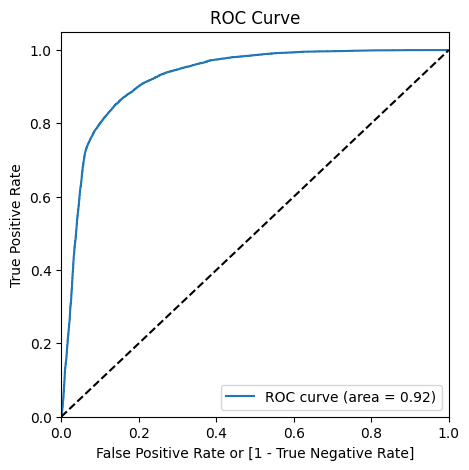

In [208]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.

### Precision and Recall

In [151]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
confusion2

array([[17348,  4077],
       [ 2280, 19145]])

##### Precision
TP / TP + FP

In [152]:
precision = confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])
print(f"Precision score is: {precision :.2f}")

Precision score is: 0.82


##### Recall
TP / TP + FN

In [153]:
recall = confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
print(f"Recall score is: {precision :.2f}")

Recall score is: 0.82


Using sklearn utilities for the same

In [154]:
from sklearn.metrics import precision_score, recall_score

In [155]:
precision2 = precision_score(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(f"Precision score is: {precision2 :.2f}")

Precision score is: 0.82


In [157]:
recall2 = recall_score(y_train_pred_final.churn, y_train_pred_final.predicted)
print(f"Recall score is: {recall2 :.2f}")

Recall score is: 0.89


### Precision and recall tradeoff

In [158]:
from sklearn.metrics import precision_recall_curve

In [159]:
y_train_pred_final.churn, y_train_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        0
 5        0
 6        0
 7        0
 8        0
 9        0
 10       0
 11       0
 12       0
 13       0
 14       0
 15       0
 16       0
 17       0
 18       0
 19       0
 20       0
 21       0
 22       0
 23       0
 24       0
 25       1
 26       0
 27       0
 28       0
 29       0
 30       0
 31       0
 32       0
 33       0
 34       0
 35       0
 36       0
 37       0
 38       0
 39       0
 40       0
 41       0
 42       1
 43       0
 44       0
 45       0
 46       0
 47       1
 48       0
 49       0
 50       0
 51       0
 52       0
 53       0
 54       0
 55       0
 56       0
 57       0
 58       0
 59       0
 60       0
 61       0
 62       0
 63       0
 64       0
 65       0
 66       0
 67       0
 68       0
 69       0
 70       0
 71       0
 72       0
 73       0
 74       0
 75       0
 76       0
 77       0
 78       0
 79       0
 80       0
 81       0
 82       0
 83 

In [160]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.churn, y_train_pred_final.churn_prob)

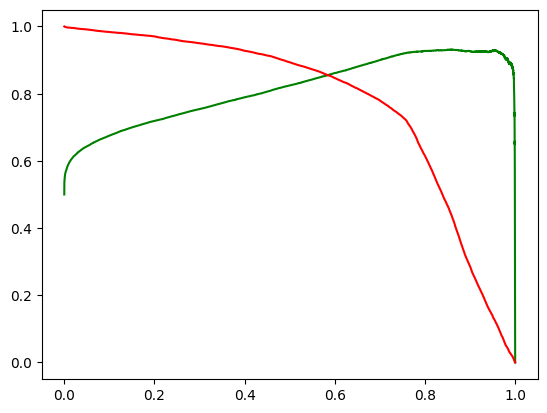

In [210]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 8: Making predictions on the test set

### Testing the model on the test set

In [162]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [163]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [164]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

##### Predictions on the test set with final model

In [165]:
# Predict on the test set
y_test_pred = log_3.predict(X_test_sm)

In [166]:
y_test_pred.head()

5704     0.045876
64892    0.000968
39613    0.132439
93118    0.031193
81235    0.017093
dtype: float64

In [167]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
5704   0.045876
64892  0.000968
39613  0.132439
93118  0.031193
81235  0.017093

In [168]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
5704       0
64892      0
39613      0
93118      0
81235      0

In [169]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [170]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [171]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [172]:
y_test_pred_final.head()

churn  CustID         0
0      0    5704  0.045876
1      0   64892  0.000968
2      0   39613  0.132439
3      0   93118  0.031193
4      0   81235  0.017093

In [173]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [174]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(columns=['CustID', 'churn', 'churn_prob'])

In [175]:
y_test_pred_final.head()

CustID  churn  churn_prob
0    5704      0    0.045876
1   64892      0    0.000968
2   39613      0    0.132439
3   93118      0    0.031193
4   81235      0    0.017093

In [176]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [177]:
y_test_pred_final.head()

CustID  churn  churn_prob  test_predicted
0    5704      0    0.045876               0
1   64892      0    0.000968               0
2   39613      0    0.132439               0
3   93118      0    0.031193               0
4   81235      0    0.017093               0

##### Metrics

In [178]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4286 1062]
 [  34  159]]


In [212]:
TP_2 = confusion[1,1] # true positive 
TN_2 = confusion[0,0] # true negatives
FP_2 = confusion[0,1] # false positives
FN_2 = confusion[1,0] # false negatives

In [213]:
print(f"True positives 2: {TP_2 :.0f}")
print(f"True negatives 2: {TN_2 :.0f}")
print(f"False positives 2: {FP_2 :.0f}")
print(f"False negatives 2: {FN_2 :.0f}")

True positives 2: 159
True negatives 2: 4286
False positives 2: 1062
False negatives 2: 34


In [180]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))


Accuracy: 0.8022017686338206
Sensitivity: 0.8238341968911918
Specificity: 0.8014210919970082


In [214]:
# Calculate false postive rate
FPR = FP_2/ float(TN_2+FP_2)
print(f"False positive rate is: {FPR :.2f}")

False positive rate is: 0.20


In [215]:
# Calculate the true positive rate
TPR = TP_2 / float(TP_2+FN_2)
print(f"True positive rate is: {TPR :.2f}")

True positive rate is: 0.82


***Model summary***

- Train set
    - Accuracy = 0.85
    - Sensitivity = 0.89
    - Specificity = 0.80
- Test set
    - Accuracy = 0.80
    - Sensitivity = 0.82
    - Specificity = 0.80
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

#### Final conclusions
We can see that the logistic model has good sensitivity and accuracy. So, we can go for with this model to identify the important predictor variables as well as the significance of each variable. The model also hels us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.

In [181]:
print(log_cols)

['offnet_mou_7', 'roam_og_mou_8', 'std_og_t2t_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action']


In [185]:
#Create a new dataframe just containing the shortlist columns and Churn column
data_2 = data[['churn','offnet_mou_7', 'roam_og_mou_8', 'std_og_t2t_mou_7', 'std_og_t2m_mou_8', 
               'isd_og_mou_8', 'og_others_7', 'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 
               'ic_others_8', 'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action']]

In [186]:
data_2.head()

churn  offnet_mou_7  roam_og_mou_8  std_og_t2t_mou_7  std_og_t2m_mou_8  \
8       0         80.63           0.00            133.43             75.69   
13      0        119.28           1.44             85.98            156.94   
16      0        229.74           0.00              2.58             18.29   
17      0          0.00          13.34              0.81              0.00   
21      0        896.68           0.00            125.94            876.99   

    isd_og_mou_8  og_others_7  total_og_mou_8  loc_ic_mou_8  std_ic_t2f_mou_8  \
8           0.00          0.0          171.56         15.79              0.00   
13          1.29          0.0         1015.26        255.26              1.91   
16          0.00          0.0          233.38        211.78              2.18   
17          0.00          0.0            0.00          0.00              0.00   
21          0.00          0.0         1068.54        159.11              0.00   

    ic_others_8  monthly_2g_8  monthly_3g_8  decrease_vbc_action  
8          0.00             0             0                    1  
13        21.44             0             0                    0  
16         0.00             0             0                    1  
17         0.00             0             0                    0  
21         0.00             0             0                    0

In [187]:
data_2.corr().round(2)

churn  offnet_mou_7  roam_og_mou_8  std_og_t2t_mou_7  \
churn                 1.00          0.02           0.14              0.07   
offnet_mou_7          0.02          1.00           0.09             -0.02   
roam_og_mou_8         0.14          0.09           1.00              0.03   
std_og_t2t_mou_7      0.07         -0.02           0.03              1.00   
std_og_t2m_mou_8     -0.03          0.65           0.00              0.07   
isd_og_mou_8         -0.02         -0.02          -0.01             -0.03   
og_others_7          -0.00         -0.00           0.02             -0.00   
total_og_mou_8       -0.10          0.51          -0.04              0.44   
loc_ic_mou_8         -0.13          0.07          -0.08             -0.17   
std_ic_t2f_mou_8     -0.02          0.00          -0.01             -0.03   
ic_others_8          -0.02          0.01          -0.01             -0.02   
monthly_2g_8         -0.05         -0.07          -0.02             -0.09   
monthly_3g_8         -0.05         -0.06           0.00             -0.10   
decrease_vbc_action  -0.04         -0.09          -0.01             -0.12   

                     std_og_t2m_mou_8  isd_og_mou_8  og_others_7  \
churn                           -0.03         -0.02        -0.00   
offnet_mou_7                     0.65         -0.02        -0.00   
roam_og_mou_8                    0.00         -0.01         0.02   
std_og_t2t_mou_7                 0.07         -0.03        -0.00   
std_og_t2m_mou_8                 1.00         -0.03        -0.01   
isd_og_mou_8                    -0.03          1.00         0.00   
og_others_7                     -0.01          0.00         1.00   
total_og_mou_8                   0.64         -0.01        -0.00   
loc_ic_mou_8                    -0.11          0.00         0.00   
std_ic_t2f_mou_8                -0.02          0.01         0.02   
ic_others_8                      0.00          0.03         0.02   
monthly_2g_8                    -0.06         -0.00        -0.00   
monthly_3g_8                    -0.06          0.01         0.01   
decrease_vbc_action             -0.09         -0.00         0.01   

                     total_og_mou_8  loc_ic_mou_8  std_ic_t2f_mou_8  \
churn                         -0.10         -0.13             -0.02   
offnet_mou_7                   0.51          0.07              0.00   
roam_og_mou_8                 -0.04         -0.08             -0.01   
std_og_t2t_mou_7               0.44         -0.17             -0.03   
std_og_t2m_mou_8               0.64         -0.11             -0.02   
isd_og_mou_8                  -0.01          0.00              0.01   
og_others_7                   -0.00          0.00              0.02   
total_og_mou_8                 1.00          0.10             -0.01   
loc_ic_mou_8                   0.10          1.00              0.05   
std_ic_t2f_mou_8              -0.01          0.05              1.00   
ic_others_8                    0.01          0.04              0.04   
monthly_2g_8                  -0.08          0.07              0.02   
monthly_3g_8                  -0.08          0.05              0.02   
decrease_vbc_action           -0.12          0.05              0.02   

                     ic_others_8  monthly_2g_8  monthly_3g_8  \
churn                      -0.02         -0.05         -0.05   
offnet_mou_7                0.01         -0.07         -0.06   
roam_og_mou_8              -0.01         -0.02          0.00   
std_og_t2t_mou_7           -0.02         -0.09         -0.10   
std_og_t2m_mou_8            0.00         -0.06         -0.06   
isd_og_mou_8                0.03         -0.00          0.01   
og_others_7                 0.02         -0.00          0.01   
total_og_mou_8              0.01         -0.08         -0.08   
loc_ic_mou_8                0.04          0.07          0.05   
std_ic_t2f_mou_8            0.04          0.02          0.02   
ic_others_8                 1.00          0.00         -0.00   
monthly_2g

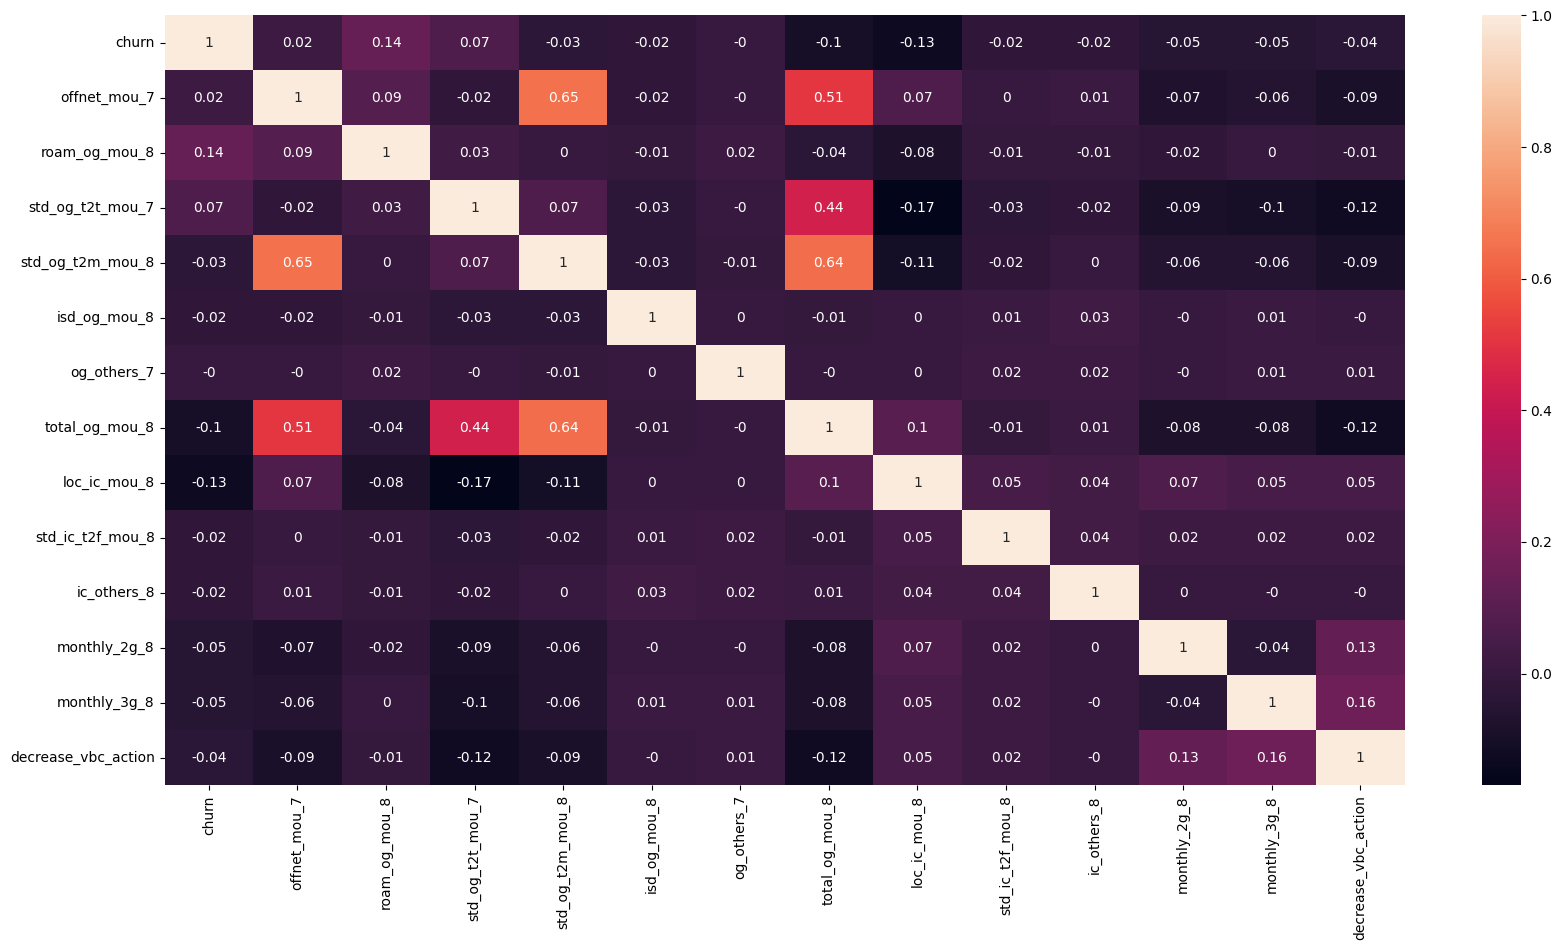

In [216]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(data_2.corr().round(2),annot = True)
plt.show()

# Conclusions and Recommendations

## Business recommendation

#### Top predictors

Below are top variables selected in the logistic regression model.

| Variables   | Coefficients |
|---------------------|--------------|
|offnet_mou_7|0.4689|
|roam_og_mou_8|0.5967|
|std_og_t2t_mou_7|0.7488|
|std_og_t2m_mou_8|0.3167|
|isd_og_mou_8|-1.1466|
|og_others_7|-1.6783|
|total_og_mou_8|-1.2600|
|loc_ic_mou_8|-2.9608|
|isd_ic_t2f_mou_8|-0.7640|
|ic_others_8|-1.3762|
|monthly_2g_8|-0.8935|
|monthly_3g_8|-1.0030|
|decrease_vbc_action|-1.3162|

We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:- 

If the local incoming minutes of usage (loc_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

However, there are some factors having positive co-efficient on churn which we need to watch out, including:
- `Offnet_mou_7`: increase in all kinds of calls outside operator T network will lead to churn.
- `std_og_mou_7` & `std_og_t2m_mou_8`: increase in STD call outside the calling circle may also bring some risk to churn, since this made the 
`loc_ic_mou_8` decrease, given the strong correlation between these 3 facts.

- `roaming_og_mou_8`: increase in roaming also bring some risk of churn.
Though most of important reflecting the behaviour change in month 8 – action month, there are also factors reflecting behavior changes in month 7 – even in good phase. Thus, we need to monitor the changes in customers behaviors since good phase.
    


#### Plots of important predictors for churn and non churn customers

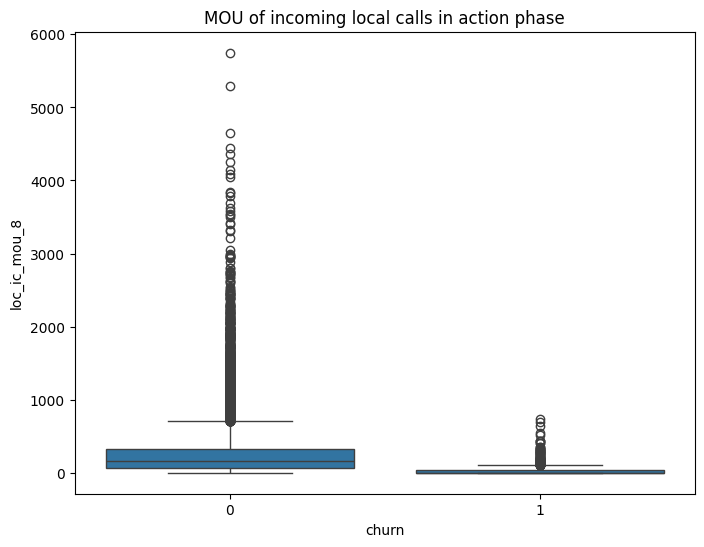

In [201]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="churn", y="loc_ic_mou_8", data=data)
plt.title("MOU of incoming local calls in action phase")
plt.show()

We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

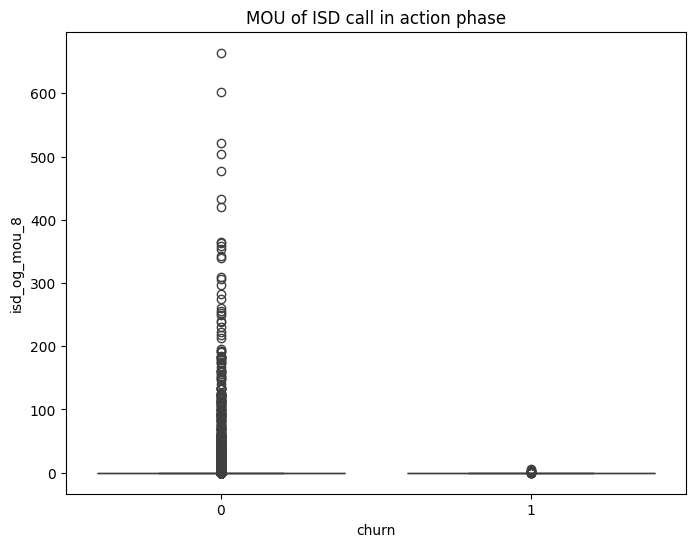

In [202]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="churn", y="isd_og_mou_8", data=data)
plt.title("MOU of ISD call in action phase")
plt.show()

We can see that the ISD outgoing minutes of usage for the month of August for churn customers is centered approximately to zero. Meanwhile, the MOU of non churn customers is little more than the churn customers.

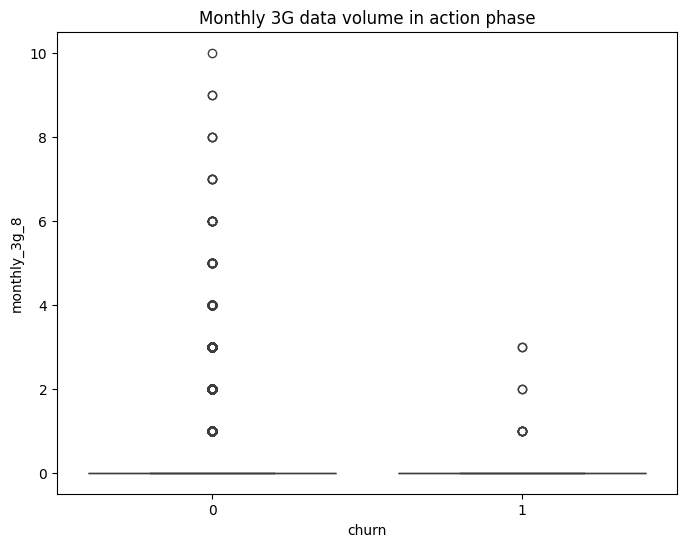

In [204]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="churn", y="monthly_3g_8", data=data)
plt.title("Monthly 3G data volume in action phase")
plt.show()

The number of monthly 3g data for August for the churn customers are very much populated around 1, whereas of non churn customers it spreads across various numbers.

Similarly we can plot each variables, which have higher coefficients, churn distribution.

***Recommendations***
- When the customers have higher demand for all calls outside of operator T network, roaming service or STD calls outside the calling circle, we should review our current price offering for these services to offer more competitive promotion/ discount to retain the customers. Otherwise, they may switch to the other operator which they tend to interact more often or provide more competitive price offering for the services they have high demand.
    - `offnet_mou_7`
    - `roam_og_mou_8`
    - `std_og_t2t_mou_7`
    - `std_og_t2m_mou_8`
- On the other hands, when observing such drop in these services even from good phase to action phase, we need to have proper contact to understand why and offer better solutions for customers in order to retain them.
    - `isd_og_mou_8`
    - `og_others_7`
    - `total_og_mou_8`
    - `loc_ic_mou_8`
    - `std_ic_t2f_mou_8`
    - `ic_others_8`
    - `monthly_2g_8`
    - `monthly_3g_8`
    - `decrease_vbc_action`
- Besides, we also need to monitor the customers behaviors sooner even from good phase (given some changes started in month 7) to have timely corrective actions in order to retain our customers.

# THANK YOU!